# Working with CRSP Data from WRDS

### Import the relevant packages

In [56]:
import wrds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Provided Code

### Create connection to the WRDS servers and download CRSP Data

###### Create connection

In [57]:
conn = wrds.Connection()

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


###### List CRSP Files and Tables

In [58]:
conn.list_tables(library='crsp')

['acti',
 'asia',
 'asib',
 'asic',
 'asio',
 'asix',
 'bmdebt',
 'bmheader',
 'bmpaymts',
 'bmquotes',
 'bmyield',
 'bndprt06',
 'bndprt12',
 'bxcalind',
 'bxdlyind',
 'bxmthind',
 'bxquotes',
 'bxyield',
 'cap',
 'ccm_lookup',
 'ccm_qvards',
 'ccmxpf_linktable',
 'ccmxpf_lnkhist',
 'ccmxpf_lnkrng',
 'ccmxpf_lnkused',
 'comphead',
 'comphist',
 'compmaster',
 'contact_info',
 'crsp_cik_map',
 'crsp_daily_data',
 'crsp_header',
 'crsp_monthly_data',
 'crsp_names',
 'crsp_portno_map',
 'crsp_ziman_daily_index',
 'crsp_ziman_monthly_index',
 'cs20yr',
 'cs5yr',
 'cs90d',
 'cst_hist',
 'daily_nav',
 'daily_nav_ret',
 'daily_returns',
 'dividends',
 'dport1',
 'dport2',
 'dport3',
 'dport4',
 'dport5',
 'dport6',
 'dport7',
 'dport8',
 'dport9',
 'dsbc',
 'dsbo',
 'dse',
 'dse62',
 'dse62delist',
 'dse62dist',
 'dse62exchdates',
 'dse62names',
 'dse62nasdin',
 'dse62shares',
 'dseall',
 'dseall62',
 'dsedelist',
 'dsedist',
 'dseexchdates',
 'dsenames',
 'dsenasdin',
 'dseshares',
 'dsf',


In [59]:
conn.describe_table('crsp', 'dsf')

Approximately 105231600 rows in crsp.dsf.


,name,nullable,type,comment
0,cusip,True,VARCHAR(8),None
1,permno,True,INTEGER,None
2,permco,True,INTEGER,None
3,issuno,True,INTEGER,None
4,hexcd,True,SMALLINT,None
5,hsiccd,True,INTEGER,None
6,date,True,DATE,None
7,bidlo,True,"NUMERIC(11, 5)",None
8,askhi,True,"NUMERIC(11, 5)",None
9,prc,True,"NUMERIC(11, 5)",None


In [60]:
conn.describe_table('crspm', 'dsfhdr')

Approximately 37776 rows in crspm.dsfhdr.


,name,nullable,type,comment
0,permno,True,INTEGER,None
1,permco,True,INTEGER,None
2,hshrcd,True,SMALLINT,None
3,dlstcd,True,SMALLINT,None
4,hcusip,True,VARCHAR(8),None
5,htick,True,VARCHAR(8),None
6,hcomnam,True,VARCHAR(35),None
7,htsymbol,True,VARCHAR(10),None
8,hnaics,True,VARCHAR(7),None
9,hprimexc,True,VARCHAR(1),None


In [61]:
conn.describe_table('crsp', 'dsfhdr')

Approximately 37776 rows in crsp.dsfhdr.


,name,nullable,type,comment
0,permno,True,INTEGER,None
1,permco,True,INTEGER,None
2,hshrcd,True,SMALLINT,None
3,dlstcd,True,SMALLINT,None
4,hcusip,True,VARCHAR(8),None
5,htick,True,VARCHAR(8),None
6,hcomnam,True,VARCHAR(35),None
7,htsymbol,True,VARCHAR(10),None
8,hnaics,True,VARCHAR(7),None
9,hprimexc,True,VARCHAR(1),None


In [62]:
conn.describe_table('crsp', 'dse')

Approximately 12648999 rows in crsp.dse.


,name,nullable,type,comment
0,event,True,VARCHAR(8),None
1,date,True,DATE,None
2,hsicmg,True,DOUBLE PRECISION,None
3,hsicig,True,DOUBLE PRECISION,None
4,comnam,True,VARCHAR(32),None
5,cusip,True,VARCHAR(8),None
6,dclrdt,True,DATE,None
7,dlamt,True,"NUMERIC(11, 5)",None
8,dlpdt,True,DATE,None
9,dlstcd,True,SMALLINT,None


In [63]:
conn.describe_table('crspm', 'dsf')

Approximately 105270144 rows in crspm.dsf.


,name,nullable,type,comment
0,cusip,True,VARCHAR(8),None
1,permno,True,INTEGER,None
2,permco,True,INTEGER,None
3,issuno,True,INTEGER,None
4,hexcd,True,SMALLINT,None
5,hsiccd,True,INTEGER,None
6,date,True,DATE,None
7,bidlo,True,"NUMERIC(11, 5)",None
8,askhi,True,"NUMERIC(11, 5)",None
9,prc,True,"NUMERIC(11, 5)",None


In [64]:
conn.describe_table('crsp', 'stocknames')

Approximately 80790 rows in crsp.stocknames.


,name,nullable,type,comment
0,permno,True,INTEGER,None
1,namedt,True,DATE,None
2,nameenddt,True,DATE,None
3,shrcd,True,SMALLINT,None
4,exchcd,True,SMALLINT,None
5,siccd,True,INTEGER,None
6,ncusip,True,VARCHAR(8),None
7,ticker,True,VARCHAR(8),None
8,comnam,True,VARCHAR(35),None
9,shrcls,True,VARCHAR(4),None


In [65]:
conn.describe_table('crsp', 'dsenames')

Approximately 113885 rows in crsp.dsenames.


,name,nullable,type,comment
0,permno,True,INTEGER,None
1,namedt,True,DATE,None
2,nameendt,True,DATE,None
3,shrcd,True,SMALLINT,None
4,exchcd,True,SMALLINT,None
5,siccd,True,INTEGER,None
6,ncusip,True,VARCHAR(8),None
7,ticker,True,VARCHAR(8),None
8,comnam,True,VARCHAR(35),None
9,shrcls,True,VARCHAR(4),None


In [66]:
conn.describe_table('crsp', 'crsp_header')

Approximately 679 rows in crsp.crsp_header.


,name,nullable,type,comment
0,permno,True,INTEGER,None
1,permco,True,INTEGER,None
2,begdt,True,DATE,None
3,enddt,True,DATE,None
4,comnam,True,VARCHAR(64),None
5,hdlstcd,True,SMALLINT,None


###### Begin coding

In [67]:
check = {'tickers': ('JNJ', 'COP')}
check

{'tickers': ('JNJ', 'COP')}

In [68]:
checking = conn.raw_sql('select a.permno, a.ticker, a.comnam, b.date, b.prc, b.ret, b.retx, b.cfacpr from crsp.stocknames a join crsp.dsf b on a.permno = b.permno WHERE a.ticker in %(tickers)s and a.st_date <= b.date and b.date <= a.end_date', params=check)
checking
del checking

In [69]:
stocks = ('AAPL', 'TSLA', 'AMZN', 'GOOG', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 'T', 'SPY', 'EWJ')

In [70]:
stocks_dict = {'tickers': ('AAPL', 'TSLA', 'AMZN', 'GOOG', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 'T', 'SPY', 'EWJ')}
print(stocks_dict)
type(stocks_dict)

{'tickers': ('AAPL', 'TSLA', 'AMZN', 'GOOG', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 'T', 'SPY', 'EWJ')}


dict

In [71]:
raw_data_from_crsp = conn.raw_sql('select a.permno, a.ticker, a.comnam, a.tsymbol, b.date, b.prc, b.ret, b.retx, b.cfacpr from crsp.dsenames a join crsp.dsf b on a.permno = b.permno WHERE a.tsymbol in %(tickers)s and a.namedt <= b.date and b.date <= a.nameendt', params=stocks_dict)
pd_data = pd.DataFrame(raw_data_from_crsp)
pd_data.info()

del raw_data_from_crsp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73632 entries, 0 to 73631
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   permno   73632 non-null  int64  
 1   ticker   73632 non-null  object 
 2   comnam   73632 non-null  object 
 3   tsymbol  73632 non-null  object 
 4   date     73632 non-null  object 
 5   prc      73632 non-null  float64
 6   ret      73627 non-null  float64
 7   retx     73627 non-null  float64
 8   cfacpr   73632 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 5.1+ MB


In [72]:
print(pd_data.head())
print(pd_data.tail())

   permno ticker             comnam tsymbol        date     prc       ret  \
0   22111    JNJ  JOHNSON & JOHNSON     JNJ  2020-10-22  145.08  0.007990   
1   10107   MSFT     MICROSOFT CORP    MSFT  1986-03-13   28.00       NaN   
2   10107   MSFT     MICROSOFT CORP    MSFT  1986-03-14   29.00  0.035714   
3   10107   MSFT     MICROSOFT CORP    MSFT  1986-03-17   29.50  0.017241   
4   10107   MSFT     MICROSOFT CORP    MSFT  1986-03-18   28.75 -0.025424   

       retx  cfacpr  
0  0.007990     1.0  
1       NaN   288.0  
2  0.035714   288.0  
3  0.017241   288.0  
4 -0.025424   288.0  
       permno ticker          comnam tsymbol        date     prc       ret  \
73627   84788   AMZN  AMAZON COM INC    AMZN  2023-12-22  153.42 -0.002730   
73628   84788   AMZN  AMAZON COM INC    AMZN  2023-12-26  153.41 -0.000065   
73629   84788   AMZN  AMAZON COM INC    AMZN  2023-12-27  153.34 -0.000456   
73630   84788   AMZN  AMAZON COM INC    AMZN  2023-12-28  153.38  0.000261   
73631   84788  

##### Convert dates to datetime and sort for proper indexing

In [73]:
pd_data['date'] = pd.to_datetime(pd_data['date'], format='%Y-%m-%d')

pd_data = pd_data.sort_values(by='date')

In [74]:
pd_data_index = pd_data.set_index('date')
pd_data_index.head()

,permno,ticker,comnam,tsymbol,prc,ret,retx,cfacpr
date,,,,,,,,
1982-11-01,14593,AAPL,APPLE COMPUTER INC,AAPL,26.750,0.054187,0.054187,224.0
1982-11-02,14593,AAPL,APPLE COMPUTER INC,AAPL,28.625,0.070094,0.070094,224.0
1982-11-03,14593,AAPL,APPLE COMPUTER INC,AAPL,30.750,0.074236,0.074236,224.0
1982-11-04,14593,AAPL,APPLE COMPUTER INC,AAPL,31.000,0.008130,0.008130,224.0
1982-11-05,14593,AAPL,APPLE COMPUTER INC,AAPL,30.125,-0.028226,-0.028226,224.0


In [75]:
# Adjust price for splits
pd_data_index['adj price'] = pd_data_index['prc'] / pd_data_index['cfacpr']
pd_data_index.info()

del pd_data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73632 entries, 1982-11-01 to 2023-12-29
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   permno     73632 non-null  int64  
 1   ticker     73632 non-null  object 
 2   comnam     73632 non-null  object 
 3   tsymbol    73632 non-null  object 
 4   prc        73632 non-null  float64
 5   ret        73627 non-null  float64
 6   retx       73627 non-null  float64
 7   cfacpr     73632 non-null  float64
 8   adj price  73632 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 5.6+ MB


##### Slicing the ticker and price column

In [76]:
pd_data_index_tic_prc = pd_data_index[['ticker', 'adj price']]
pd_data_index_tic_prc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73632 entries, 1982-11-01 to 2023-12-29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     73632 non-null  object 
 1   adj price  73632 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [77]:
# Slice out data from January 1, 2016 to March 30, 2018
b = pd_data_index_tic_prc[('2016-01-01' <= pd_data_index_tic_prc.index) & (pd_data_index_tic_prc.index <= '2023-12-31')]
print(b.head(), b.tail())

           ticker   adj price
date                         
2016-01-04    SPY  201.019200
2016-01-04     HD  131.070010
2016-01-04      T   26.314076
2016-01-04   AAPL   26.337500
2016-01-04    JPM   63.620000            ticker  adj price
date                        
2023-12-29   TSLA  248.48000
2023-12-29   GOOG  140.92999
2023-12-29   MSFT  376.04001
2023-12-29    JPM  170.10001
2023-12-29   AMZN  151.94000


In [78]:
b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24144 entries, 2016-01-04 to 2023-12-29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     24144 non-null  object 
 1   adj price  24144 non-null  float64
dtypes: float64(1), object(1)
memory usage: 565.9+ KB


In [79]:
table = b.pivot(columns='ticker')
table.columns = [col[1] for col in table.columns]
table.head()

,AAPL,AMZN,EWJ,GOOG,HD,JNJ,JPM,MSFT,SPY,T,TSLA,WMT
date,,,,,,,,,,,,
2016-01-04,26.3375,31.849500,47.72,37.092001,131.07001,100.48,63.62,54.80,201.01920,26.314076,14.894000,61.46
2016-01-05,25.6775,31.689499,48.32,37.129001,130.42999,100.90,63.73,55.05,201.36000,26.497930,14.895333,62.92
2016-01-06,25.1750,31.632501,47.48,37.181000,129.08000,100.39,62.81,54.05,198.82001,26.091919,14.602666,63.55
2016-01-07,24.1125,30.397000,46.76,36.319500,125.40000,99.22,60.27,52.17,194.05000,25.670588,14.376666,65.03
2016-01-08,24.2400,30.352500,45.76,35.723498,123.90000,98.16,58.92,52.33,191.92300,25.693569,14.066667,63.54


In [80]:
table.describe()

,AAPL,AMZN,EWJ,GOOG,HD,JNJ,JPM,MSFT,SPY,T,TSLA,WMT
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,90.791868,100.472923,57.301663,79.061171,234.346635,144.412646,114.531426,176.226521,325.329161,23.972375,113.851756,113.965268
std,55.870061,44.802150,6.474248,35.156013,74.411156,20.077548,28.720264,97.166219,82.962306,4.943863,112.995334,30.335506
min,22.585000,24.103501,41.280000,33.413000,111.850000,95.750000,53.070000,48.430000,182.860000,13.450000,9.578000,60.840000
25%,41.314373,59.763623,53.057500,51.427498,172.390000,129.637500,95.507500,86.250000,258.267495,20.154913,18.944666,86.267500
50%,66.661251,94.572501,56.995000,64.682751,225.655000,142.585010,113.345000,153.435005,300.199995,23.571590,28.505667,118.130000
75%,145.860000,140.577510,60.810000,110.598874,298.920003,162.764993,137.582500,259.447492,407.132502,28.583521,223.411667,141.695002
max,198.110000,186.570495,74.120000,150.708996,416.179990,186.009990,171.780000,382.700010,477.709990,33.300521,409.970010,169.780000


#### Buid tables and calculate returns

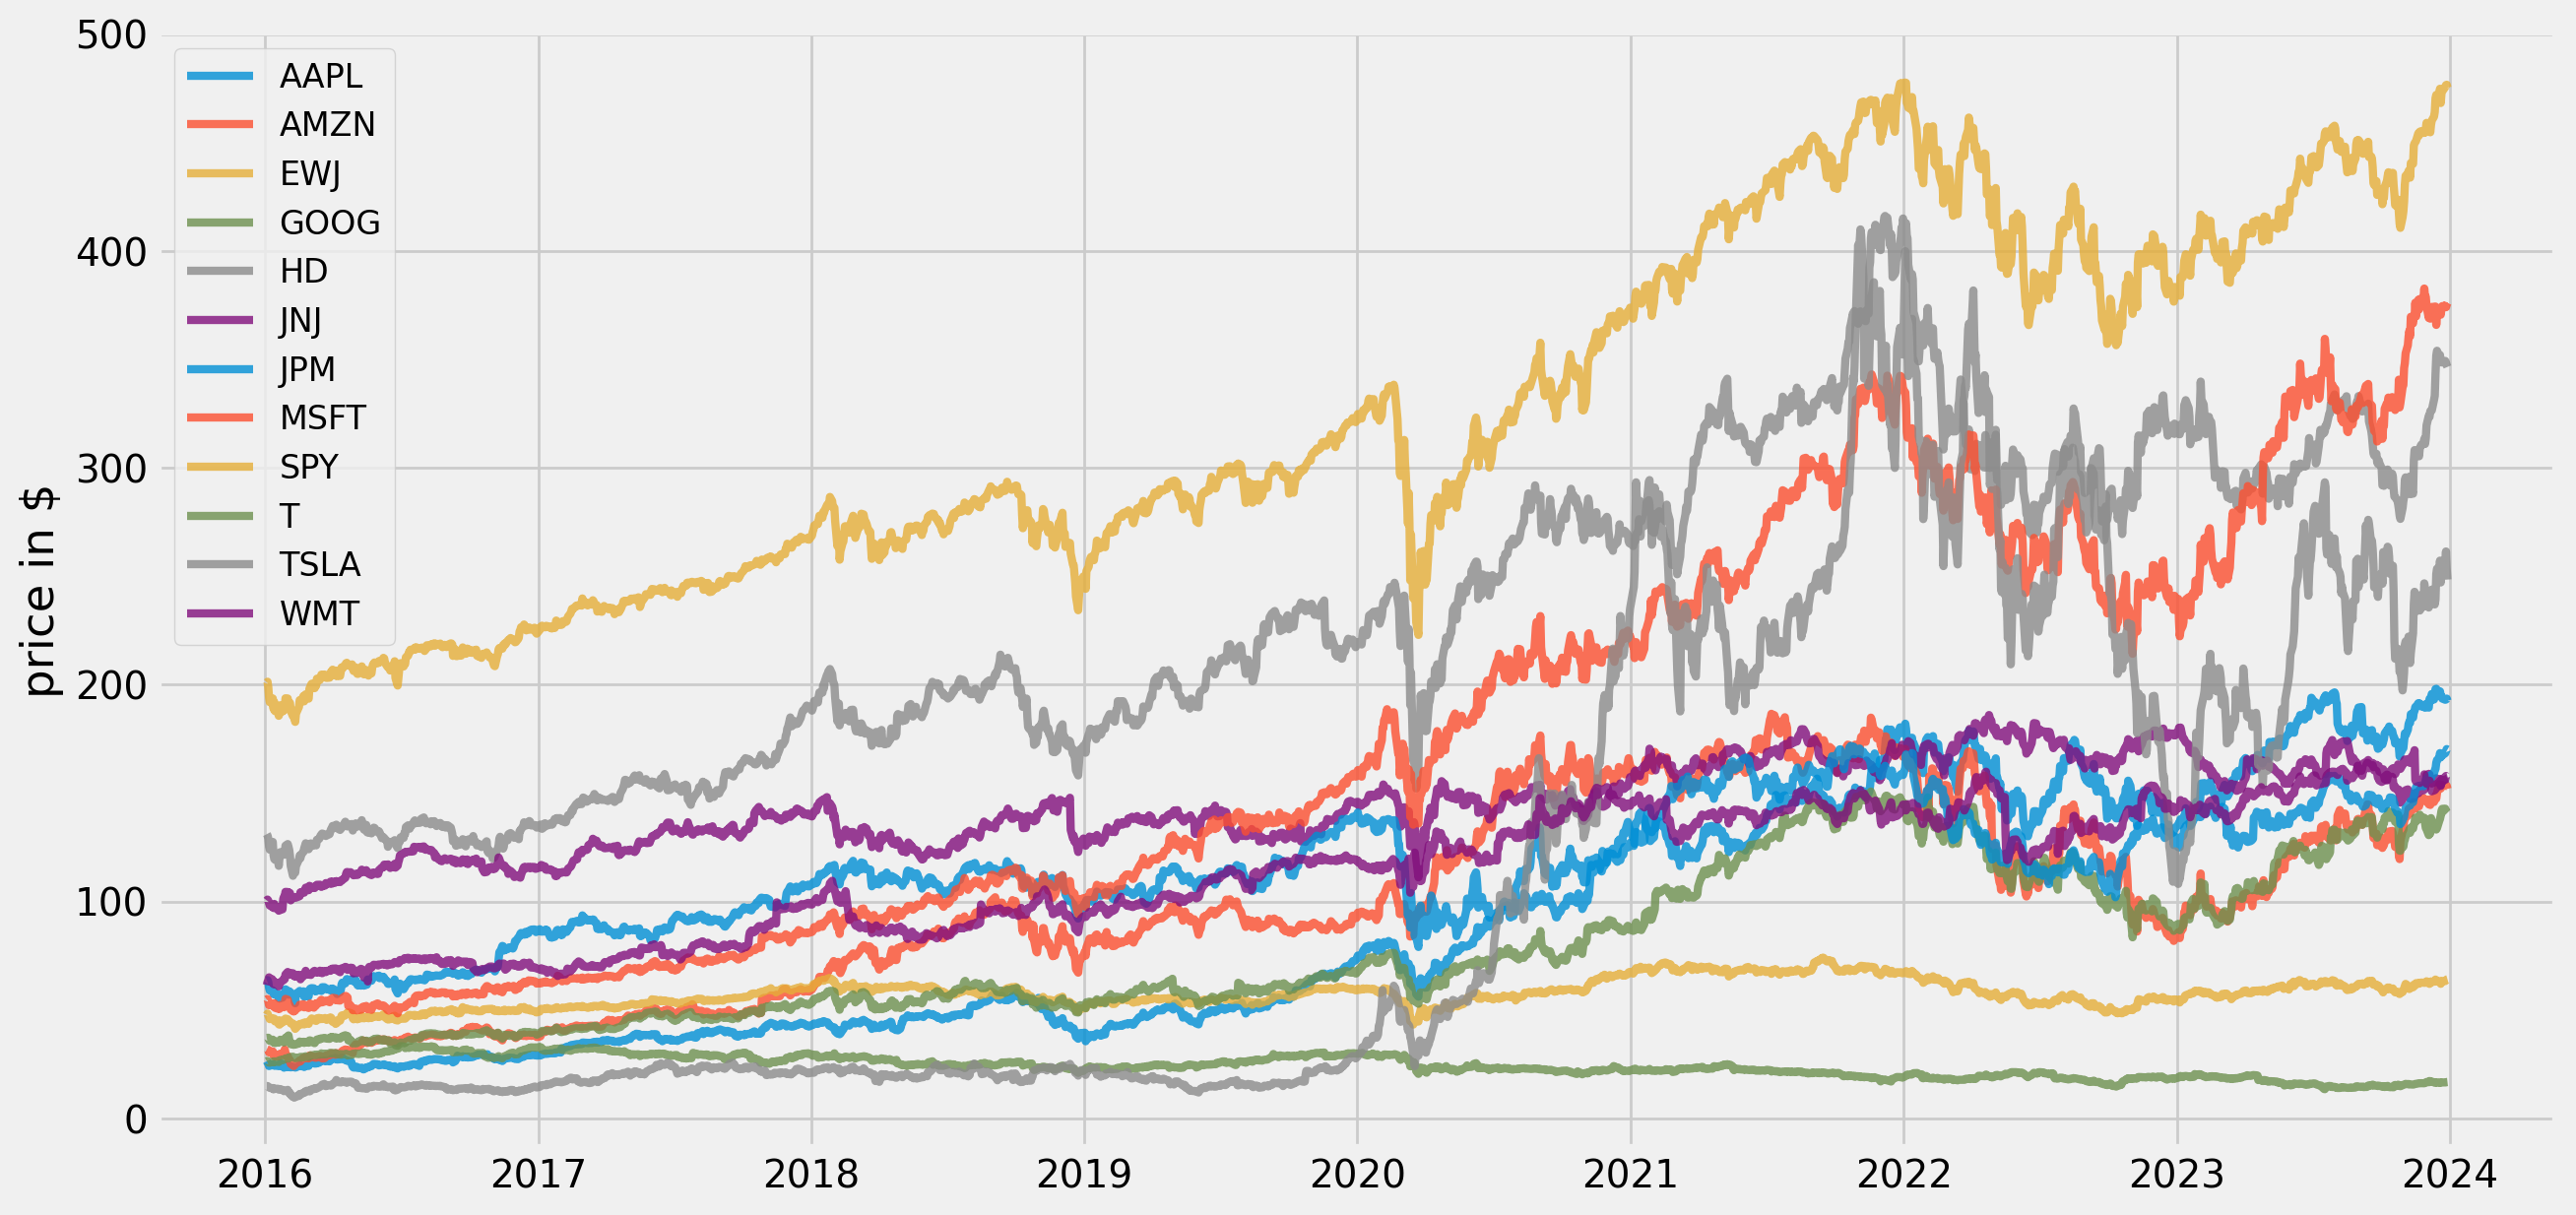

In [81]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

plt.show()

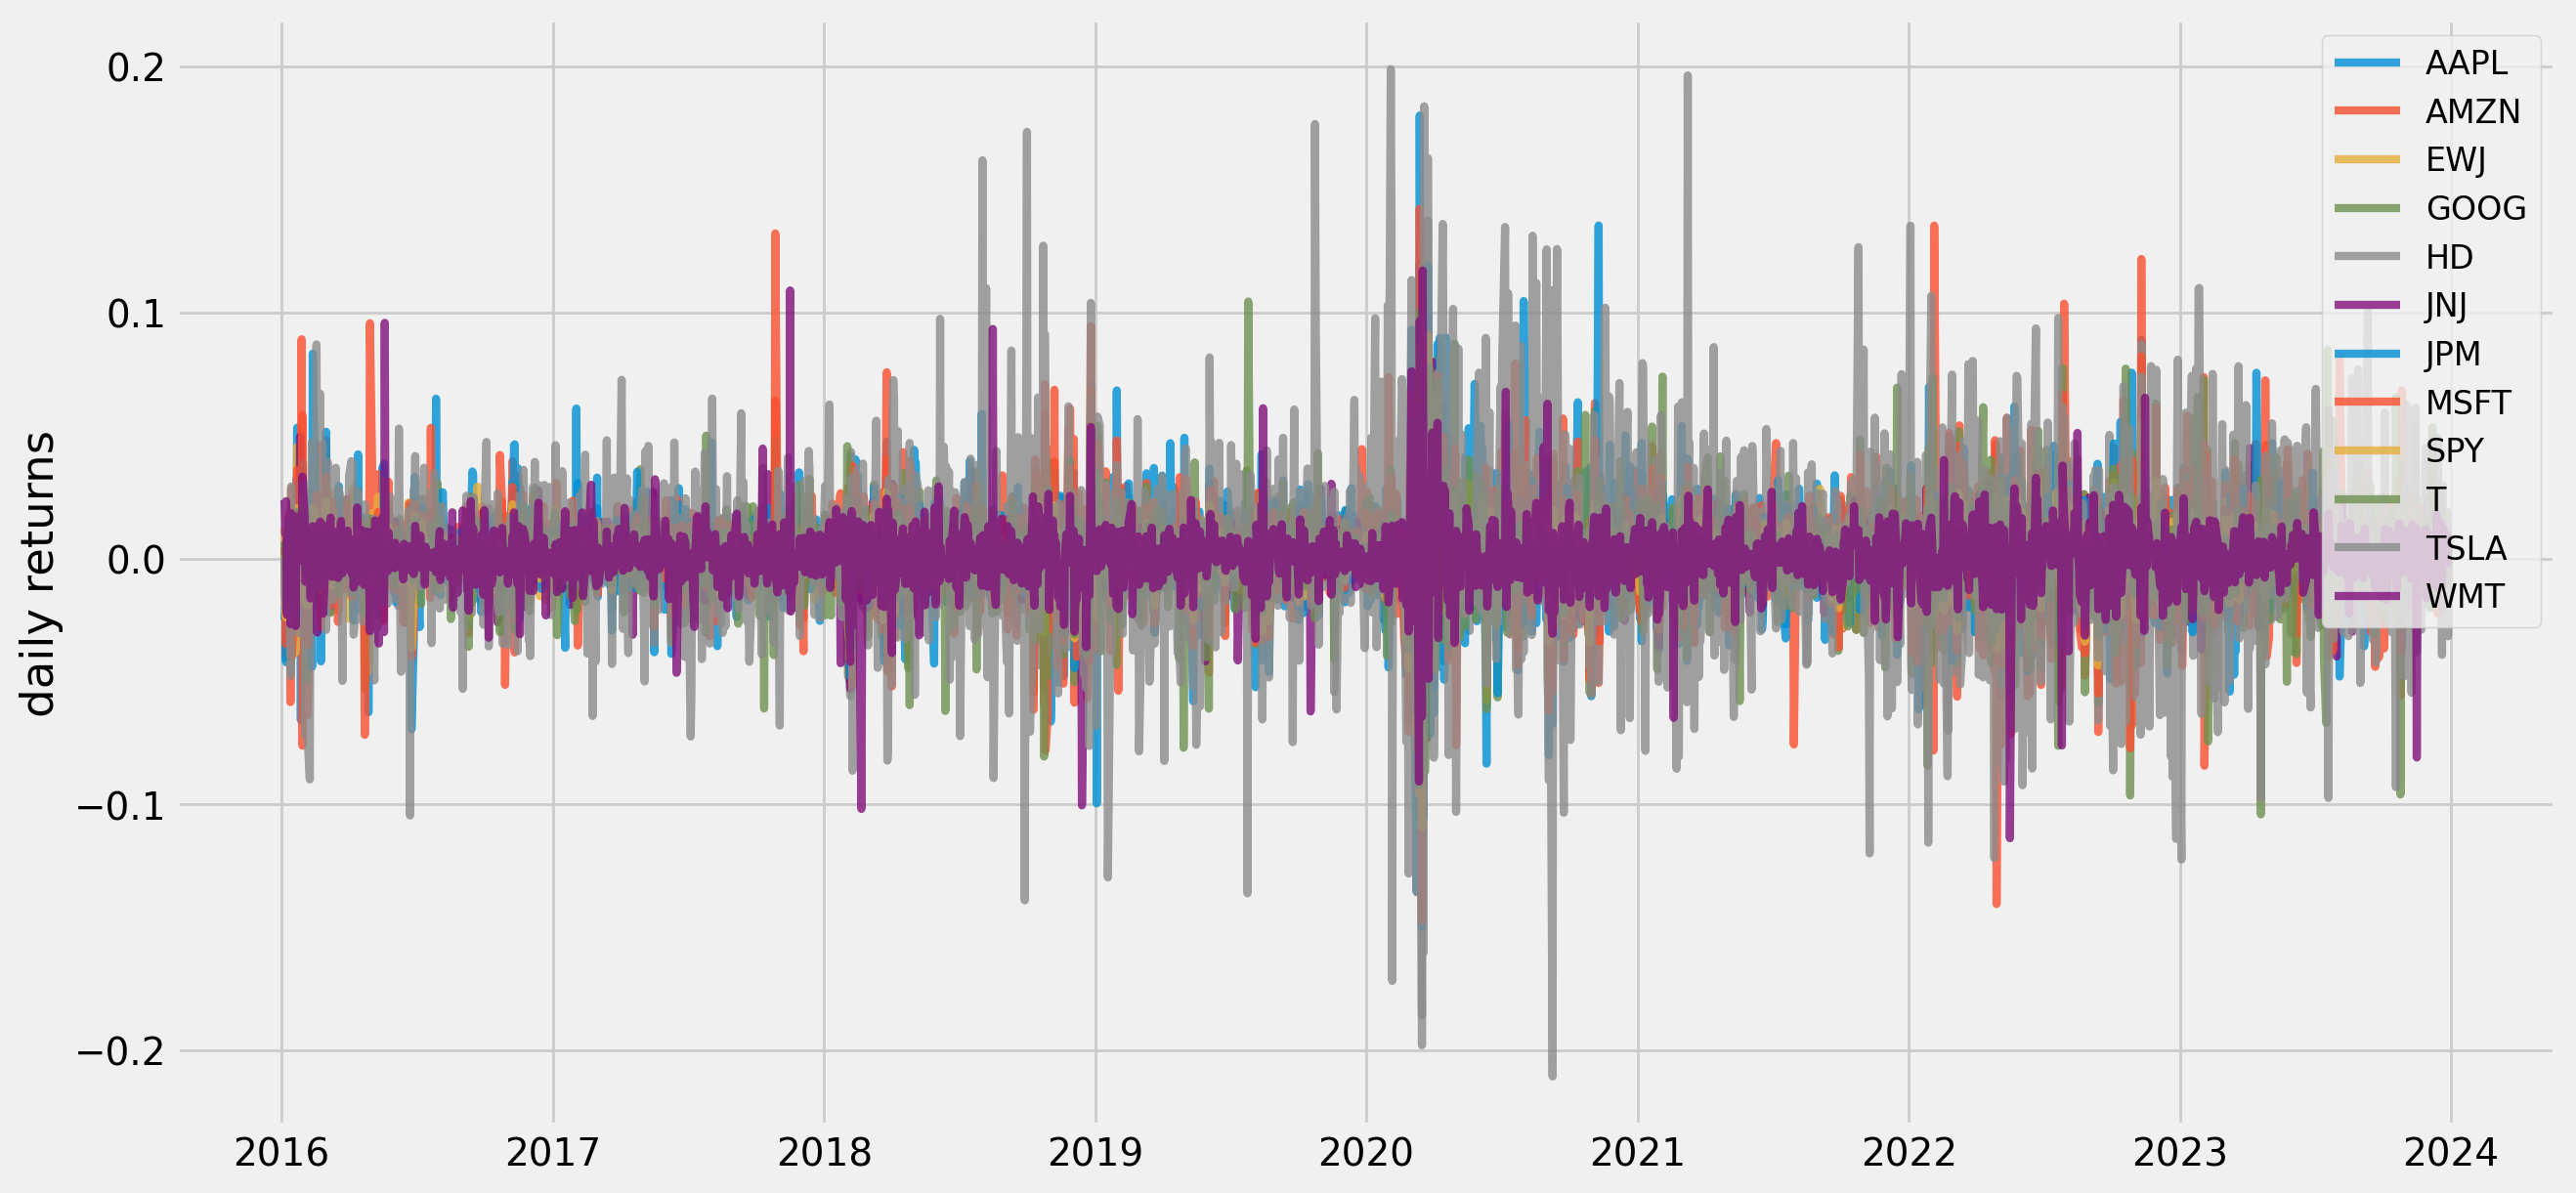

In [82]:
returns = table.pct_change()

plt.figure(figsize=(14,7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.show()

In [83]:
returns.describe()

,AAPL,AMZN,EWJ,GOOG,HD,JNJ,JPM,MSFT,SPY,T,TSLA,WMT
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.001160,0.000995,0.000205,0.000825,0.000612,0.000290,0.000649,0.001111,0.000496,-0.000110,0.002071,0.000561
std,0.018477,0.020883,0.010722,0.017934,0.015941,0.011716,0.017896,0.017512,0.011635,0.015067,0.036667,0.013590
min,-0.128647,-0.140494,-0.098047,-0.111008,-0.197938,-0.100379,-0.149649,-0.147390,-0.109424,-0.104061,-0.210628,-0.113757
25%,-0.007397,-0.008626,-0.005151,-0.006919,-0.006432,-0.004967,-0.007483,-0.006874,-0.003757,-0.006606,-0.016192,-0.005575
50%,0.000951,0.001224,0.000484,0.000979,0.000974,0.000225,0.000352,0.000982,0.000596,0.000338,0.001367,0.000625
75%,0.010258,0.011161,0.005884,0.009408,0.008267,0.005922,0.008676,0.010073,0.005971,0.007076,0.019509,0.006763
max,0.119808,0.135359,0.069444,0.104485,0.137508,0.079977,0.180125,0.142169,0.090603,0.100223,0.198949,0.117085


## Student Code

In [84]:
monthly_returns = returns.groupby([returns.index.year, returns.index.month]).apply(lambda x: (1 + x).prod() -1)
monthly_returns.describe()

,AAPL,AMZN,EWJ,GOOG,HD,JNJ,JPM,MSFT,SPY,T,TSLA,WMT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.024379,0.020310,0.003904,0.016407,0.012246,0.005736,0.012896,0.021952,0.010080,-0.002779,0.045409,0.011206
std,0.083816,0.089667,0.040680,0.069796,0.064747,0.047036,0.072456,0.058945,0.046473,0.061706,0.188524,0.051929
min,-0.184045,-0.237525,-0.089490,-0.176750,-0.150953,-0.121511,-0.224615,-0.109267,-0.129987,-0.172345,-0.367334,-0.159226
25%,-0.036637,-0.043764,-0.020767,-0.026062,-0.030735,-0.019814,-0.033512,-0.013035,-0.011706,-0.037891,-0.077007,-0.022039
50%,0.030846,0.026152,0.005946,0.017290,0.011719,0.008246,0.017286,0.021351,0.014942,-0.005132,0.011420,0.013629
75%,0.090949,0.074636,0.025178,0.066462,0.060079,0.036493,0.058547,0.059079,0.036582,0.036854,0.128318,0.043628
max,0.214380,0.270596,0.116223,0.165080,0.181582,0.144208,0.204593,0.176291,0.126984,0.188396,0.741452,0.117353


In [85]:
def stock_histogram(dataframe, asset, title, market='SPY'):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.hist(dataframe[asset], bins=50, alpha=0.5, label=asset, edgecolor='black')
    plt.hist(dataframe[market], bins=50, alpha=0.5, label=market, edgecolor='black')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()


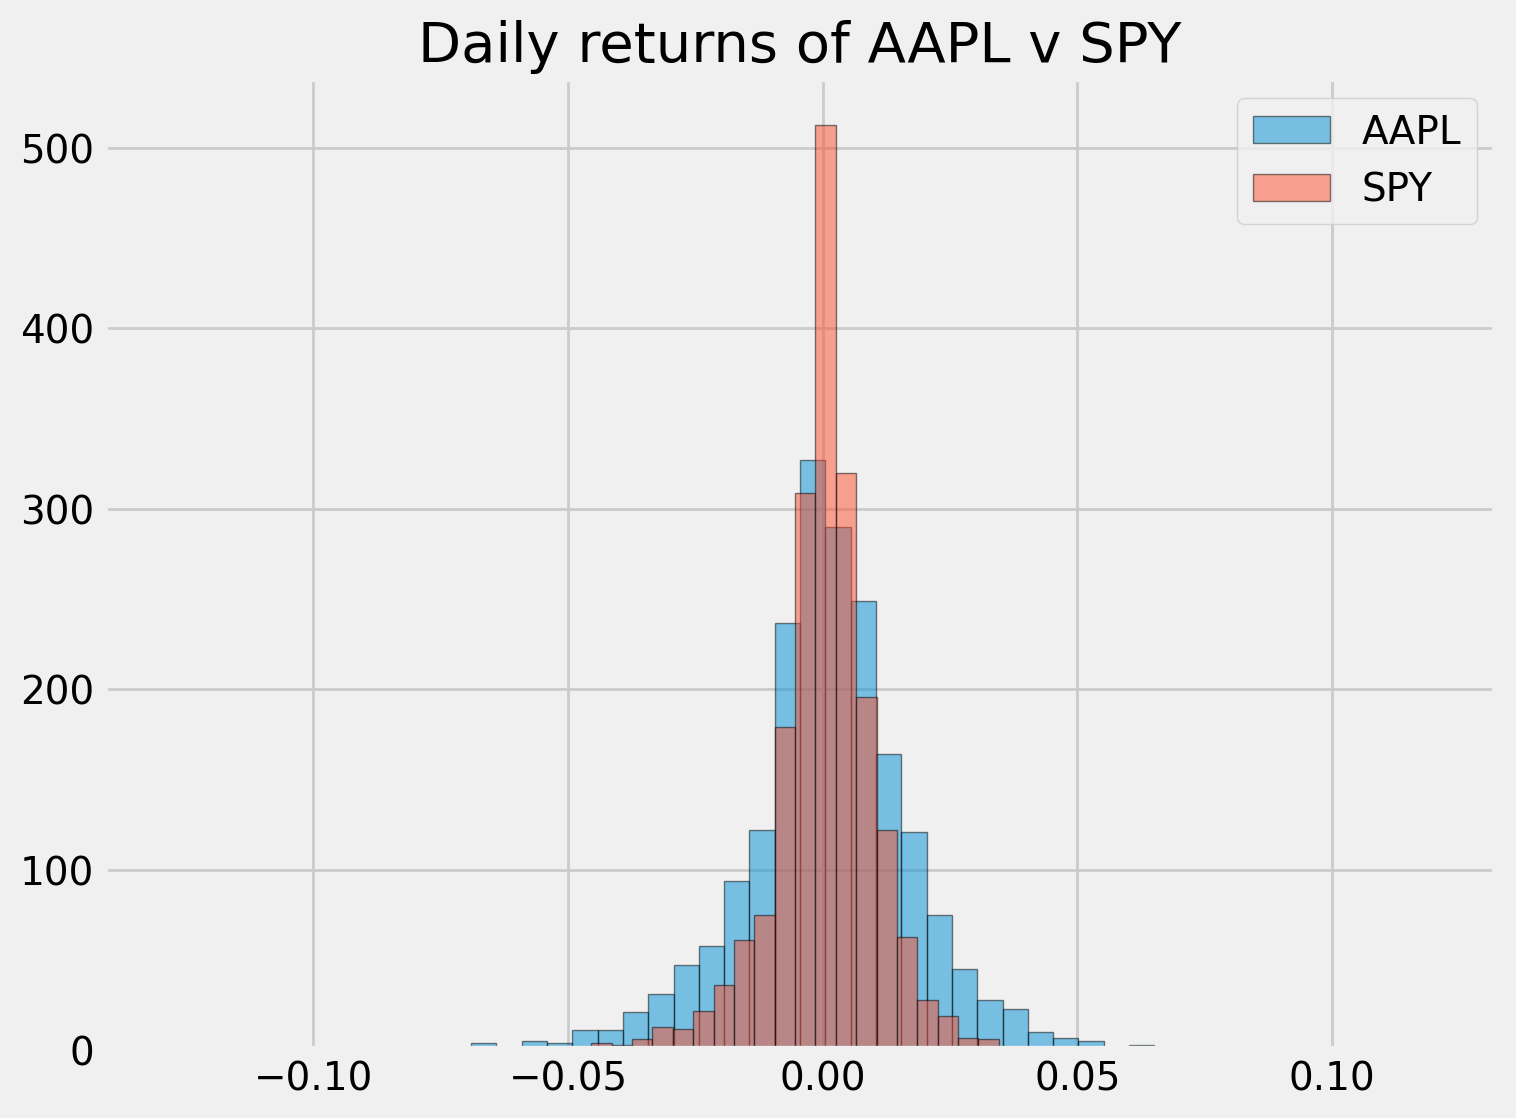

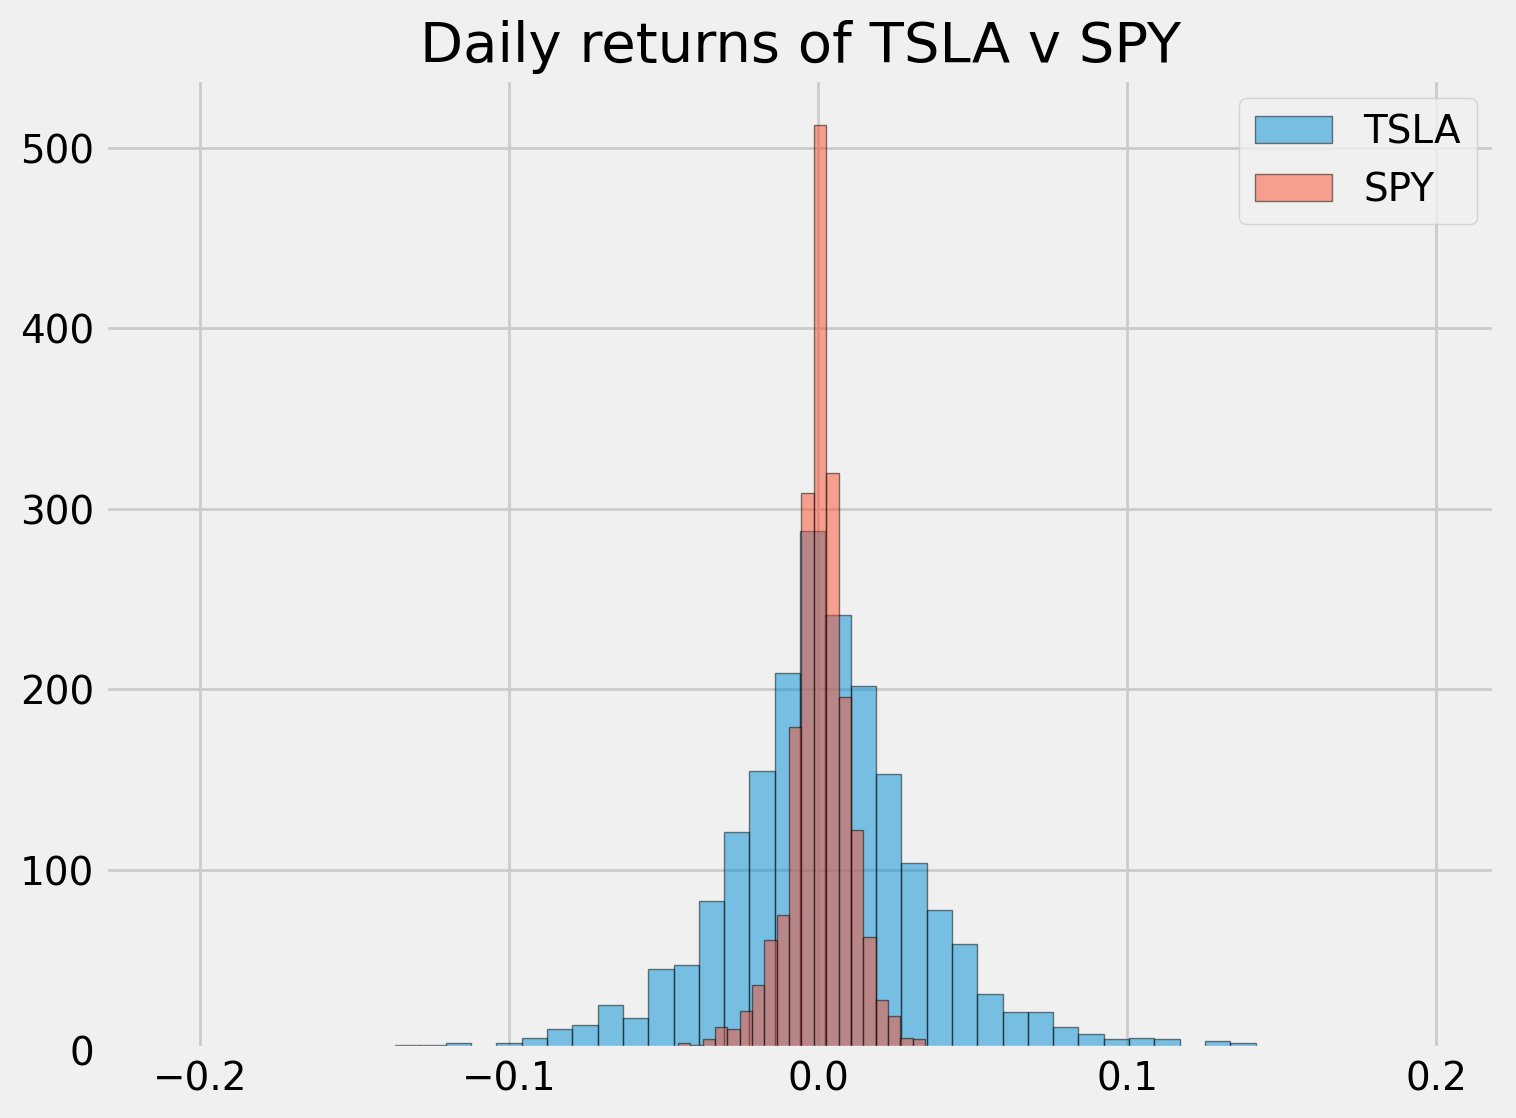

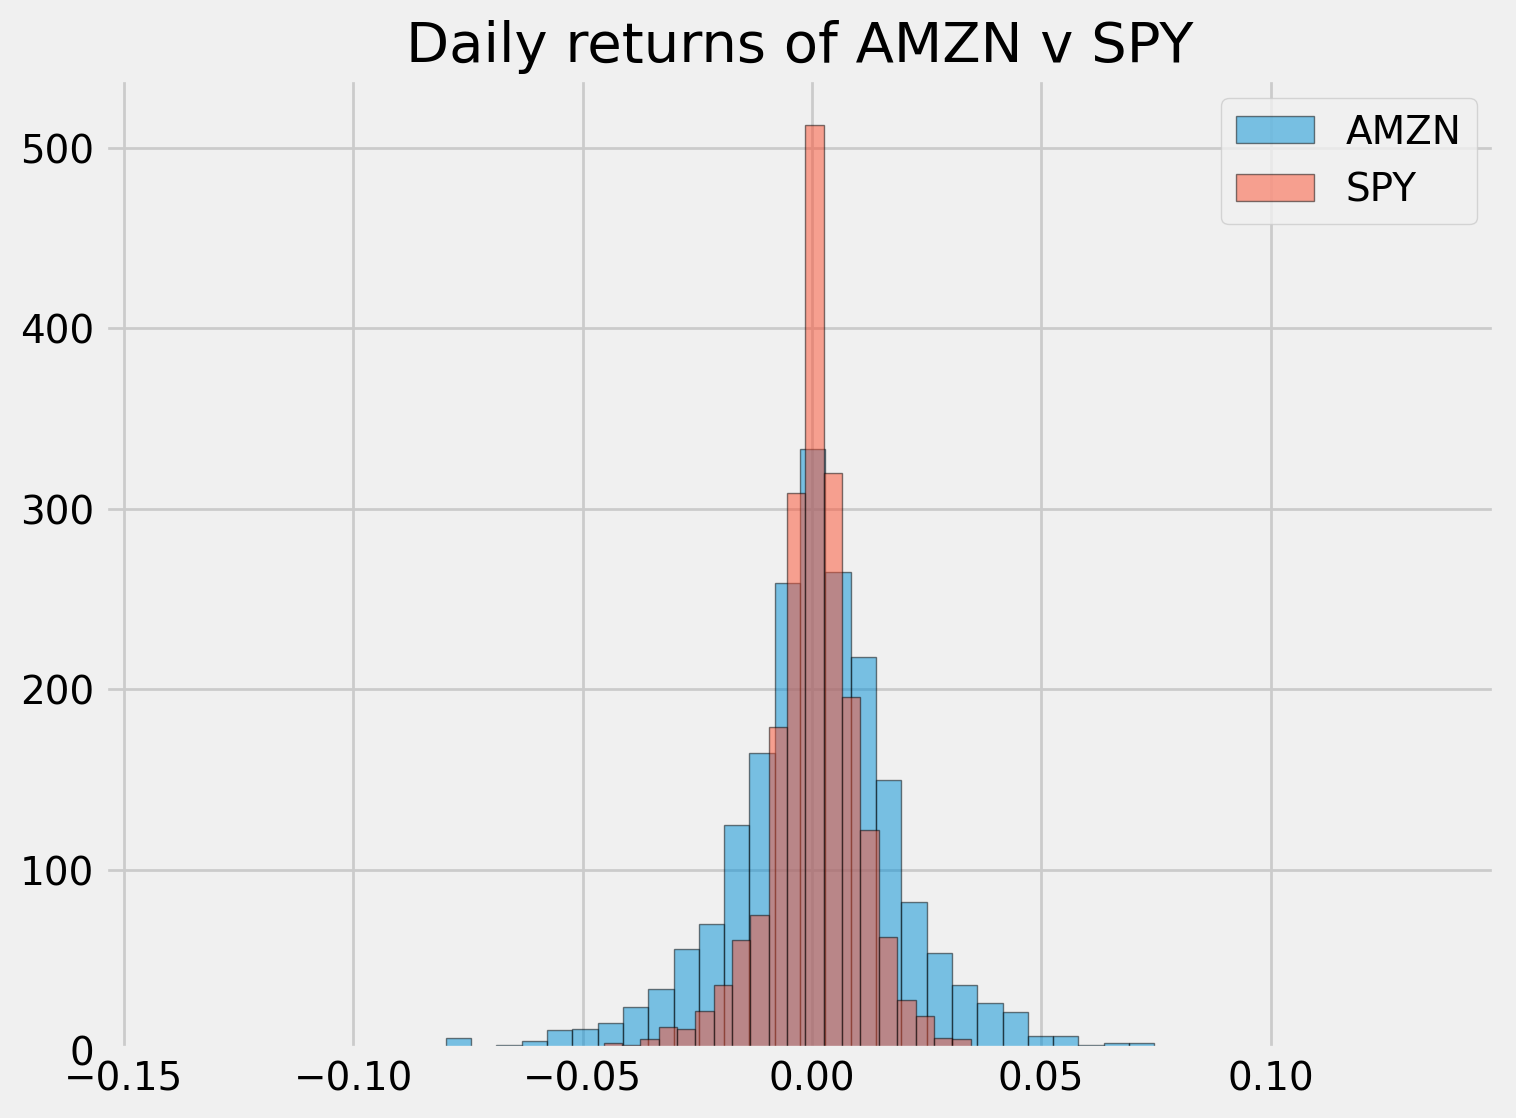

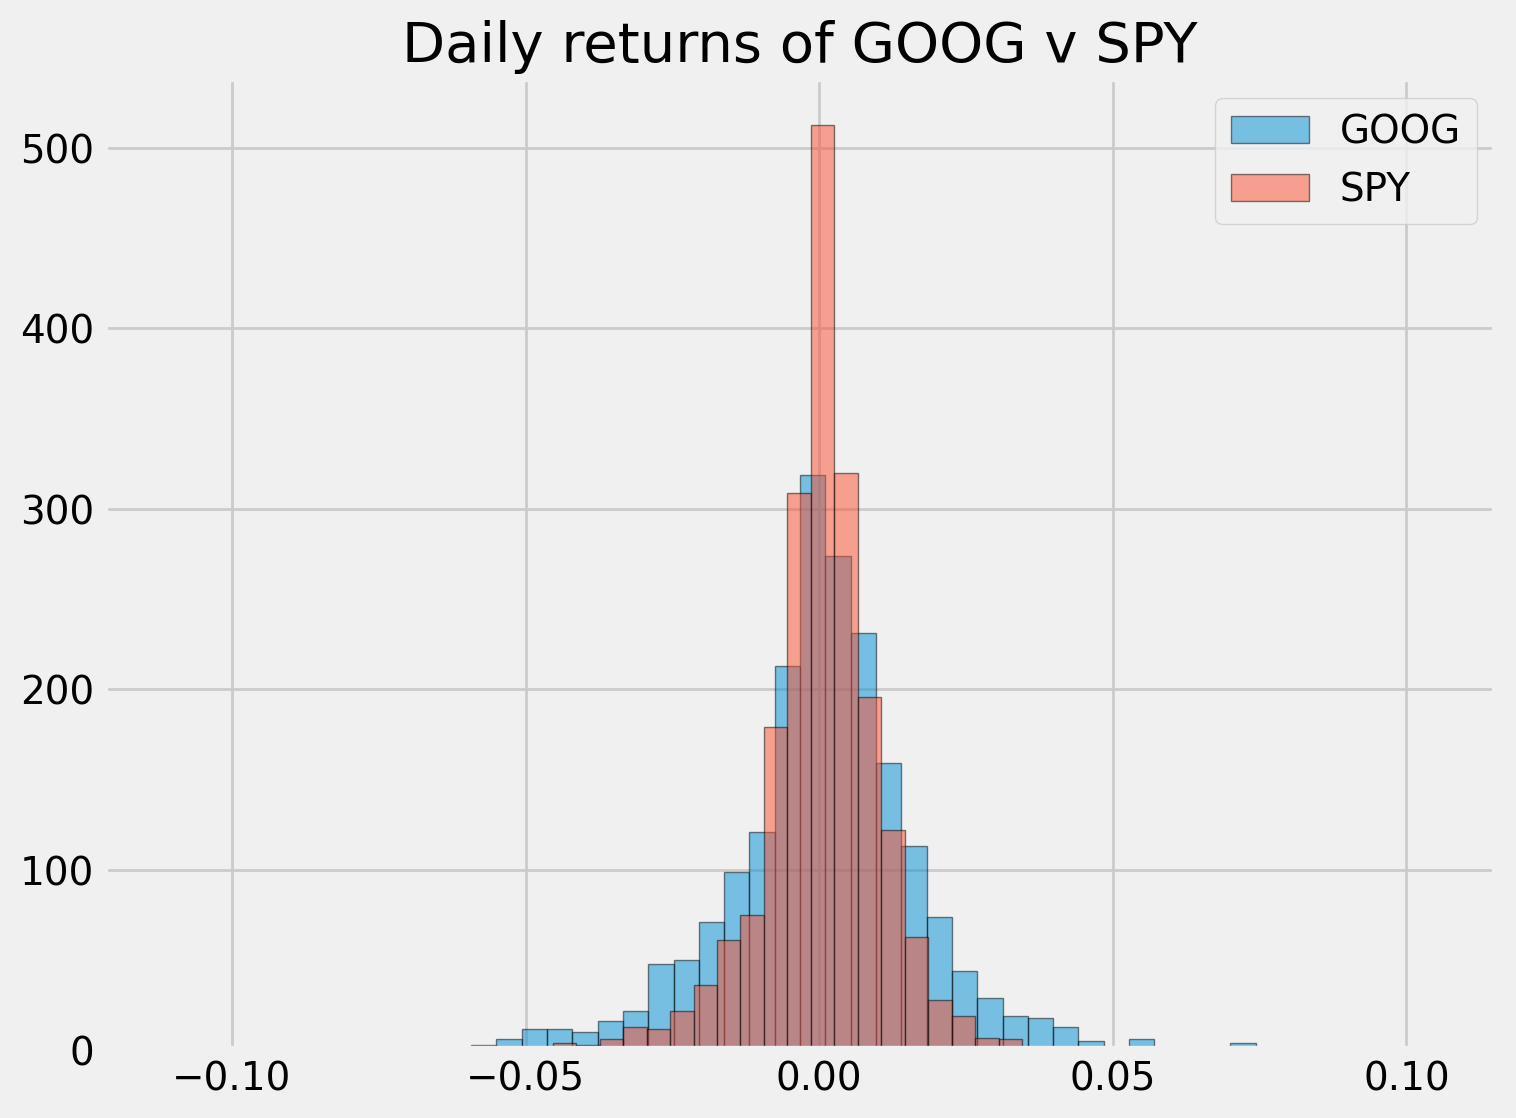

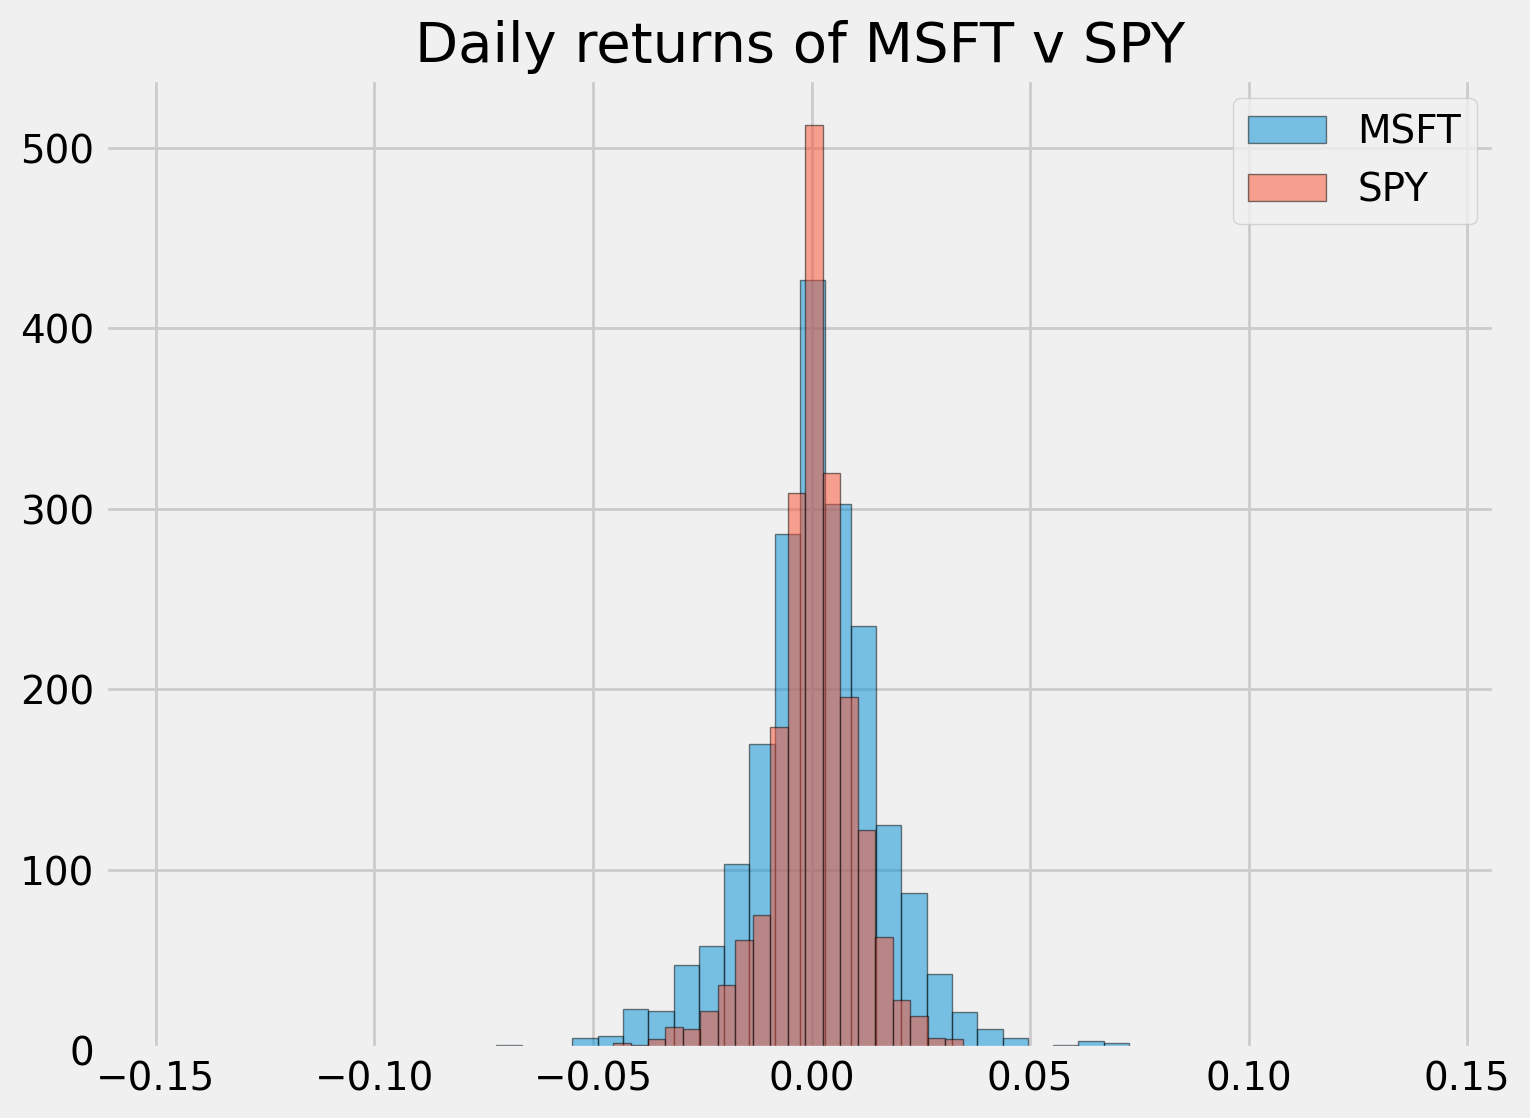

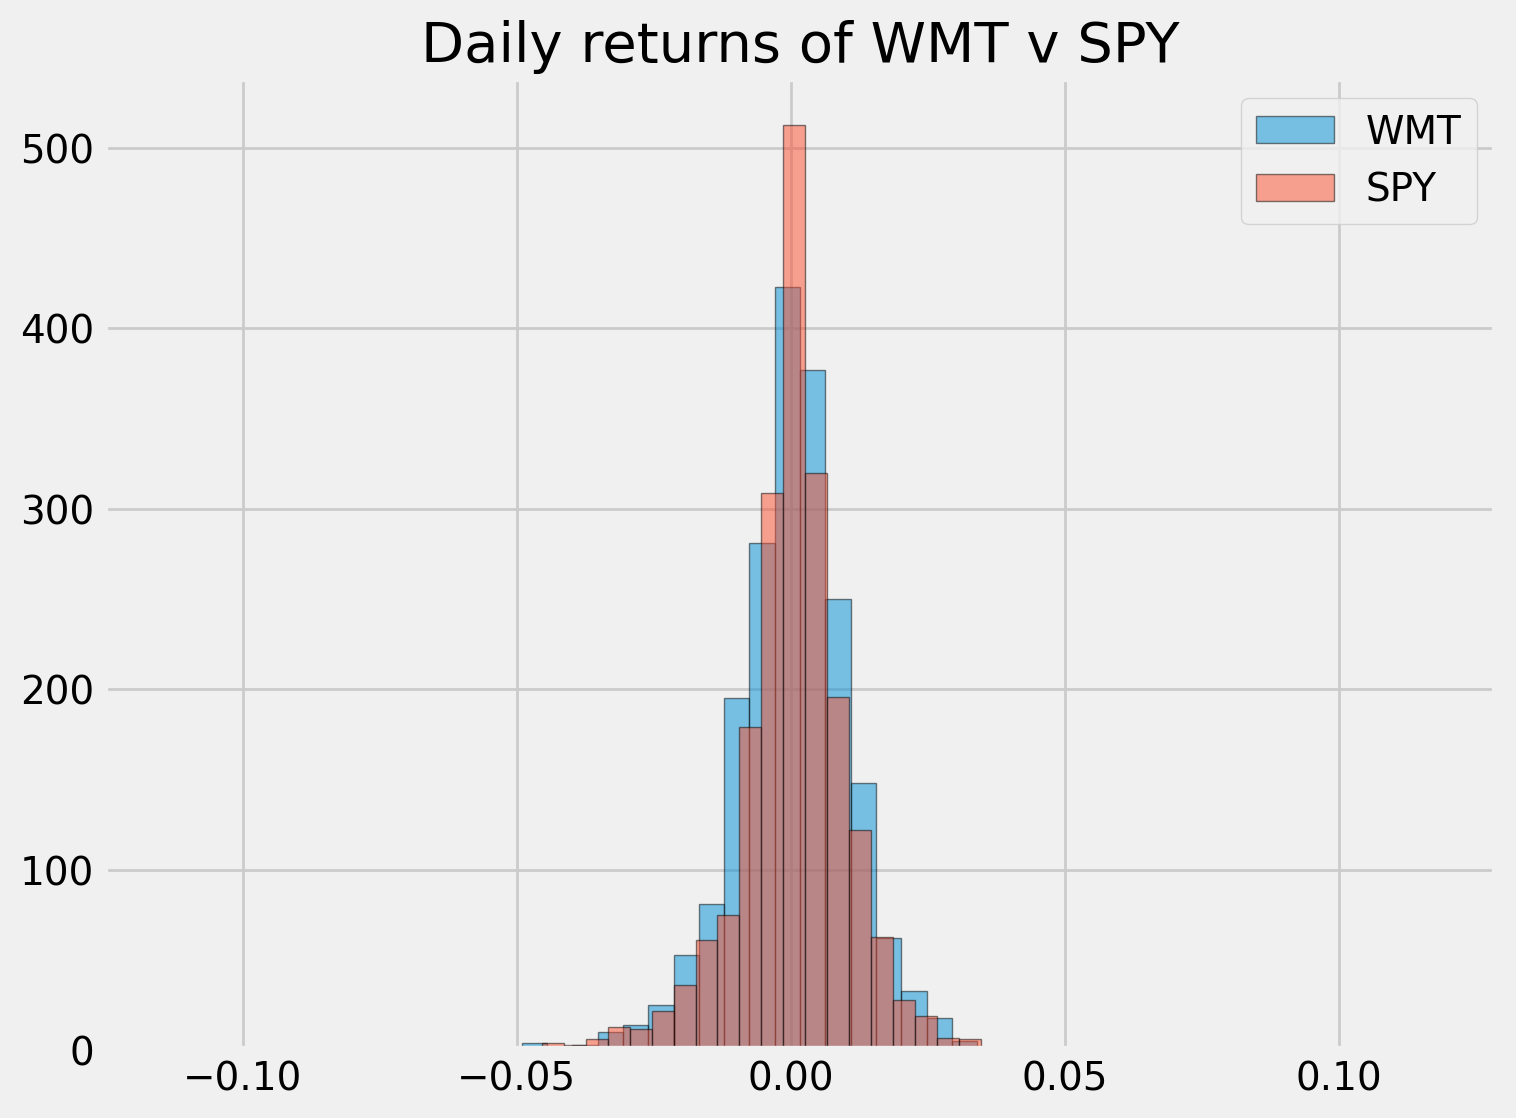

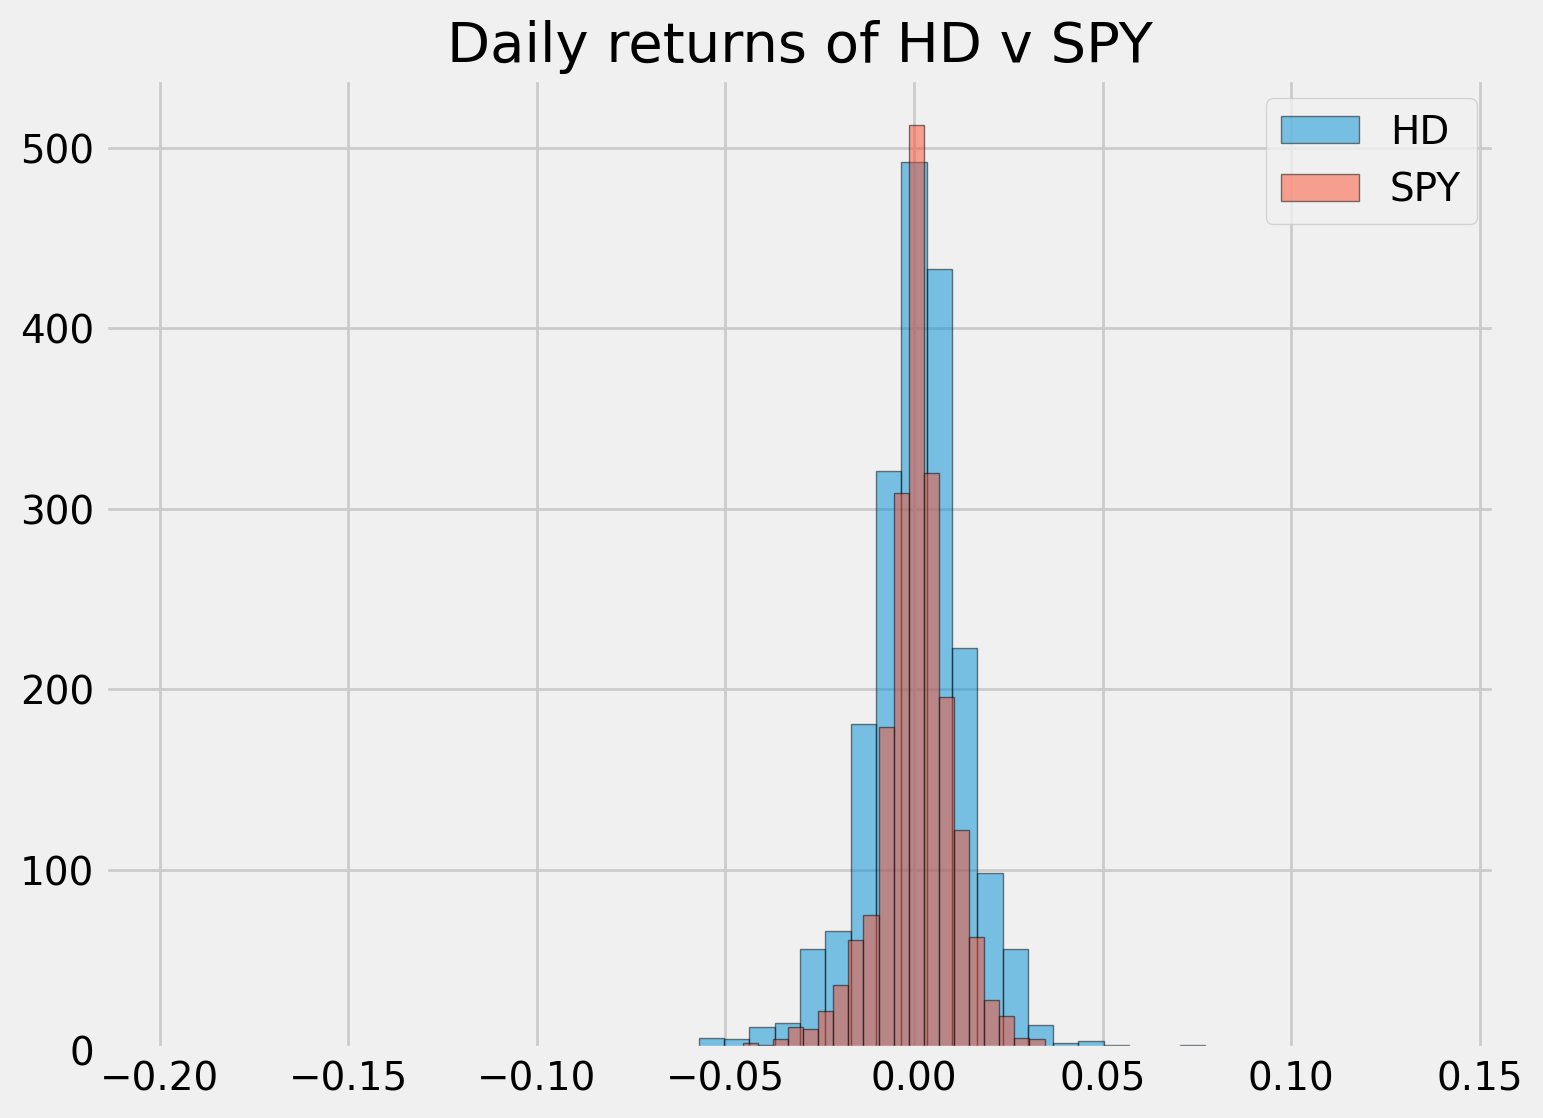

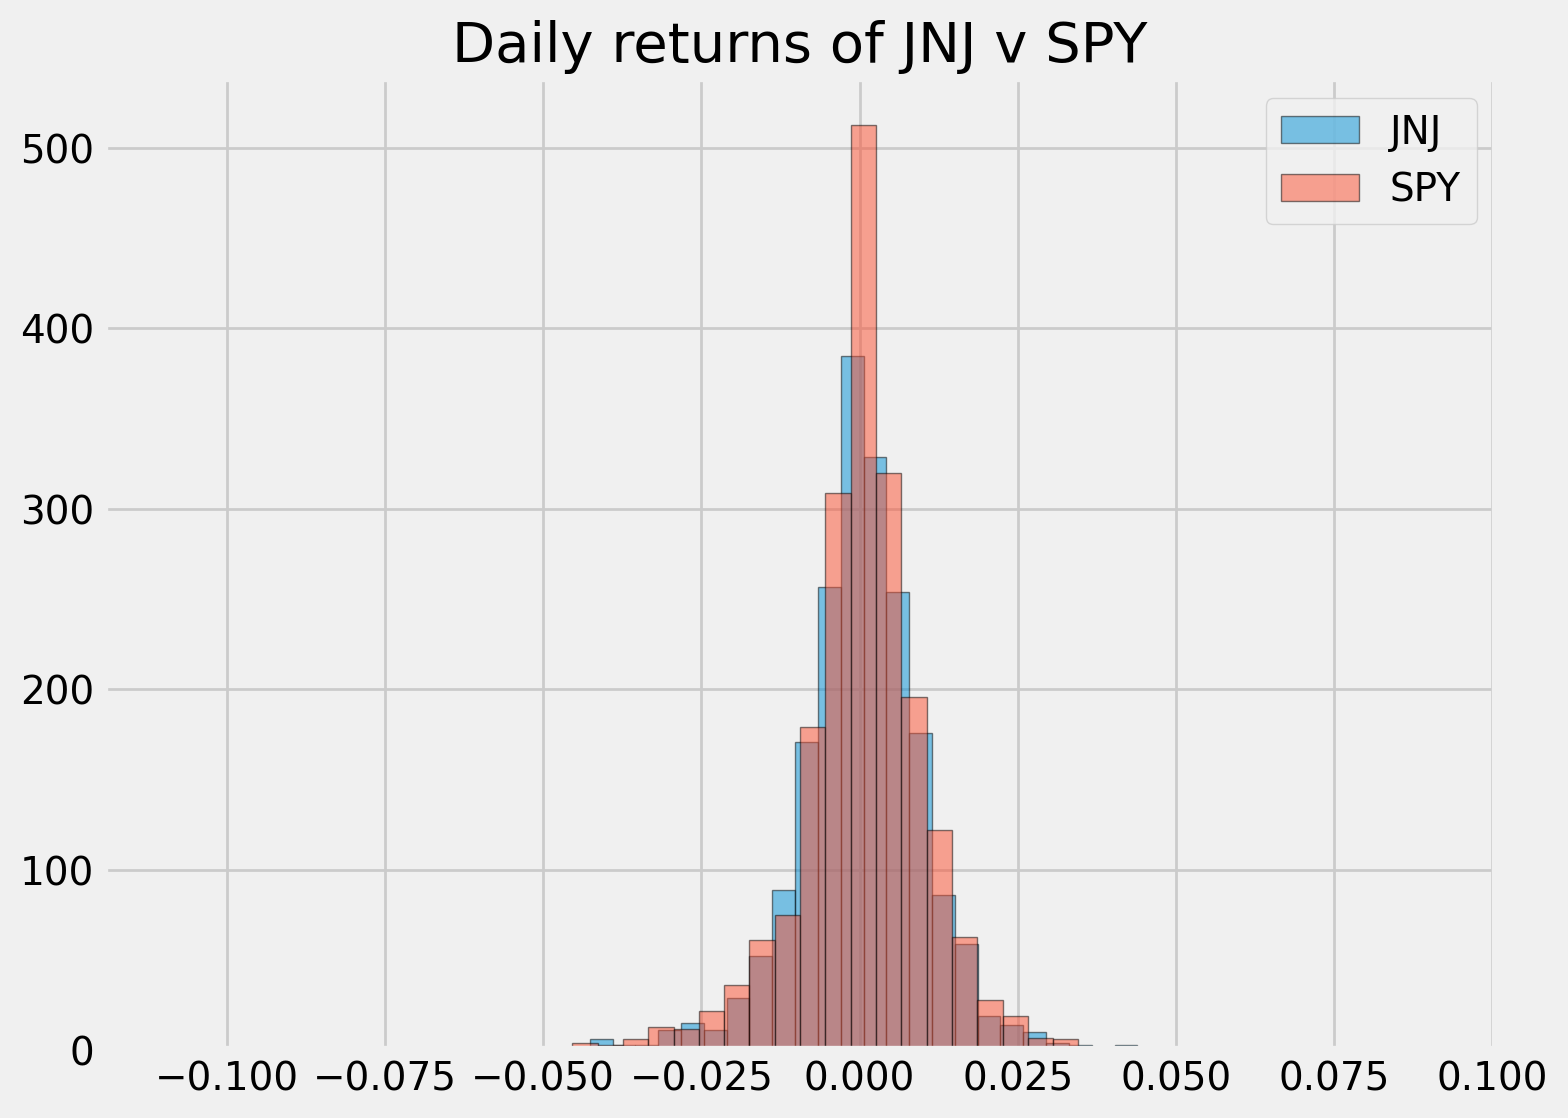

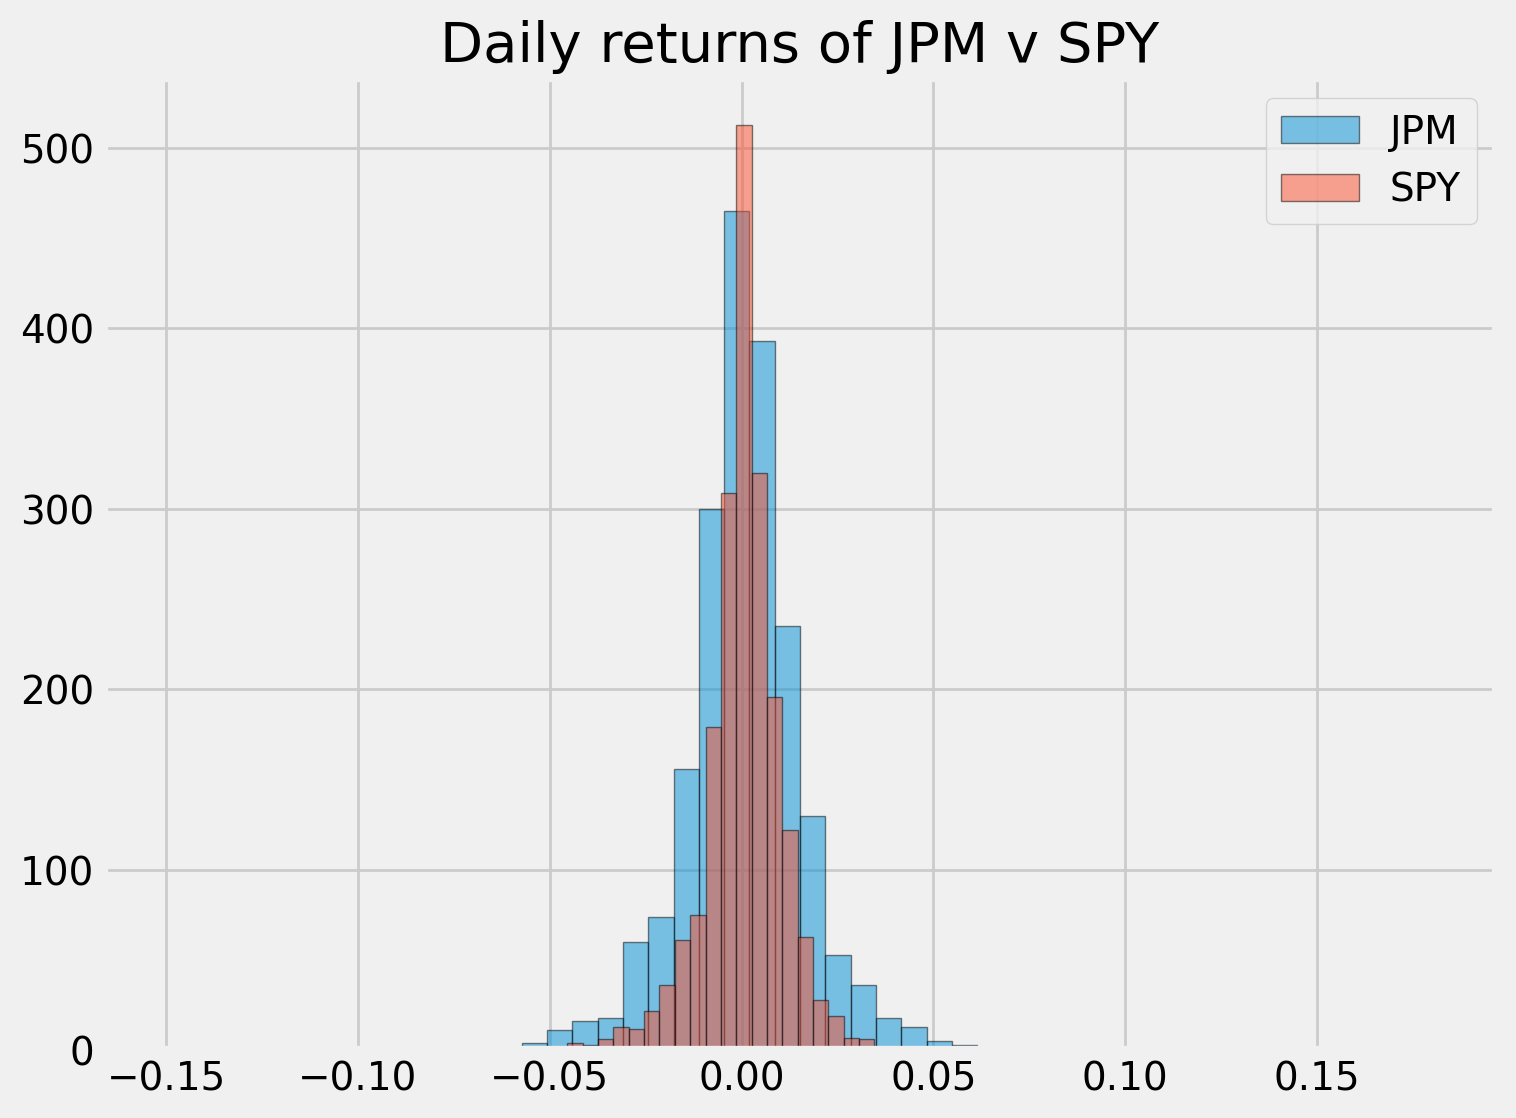

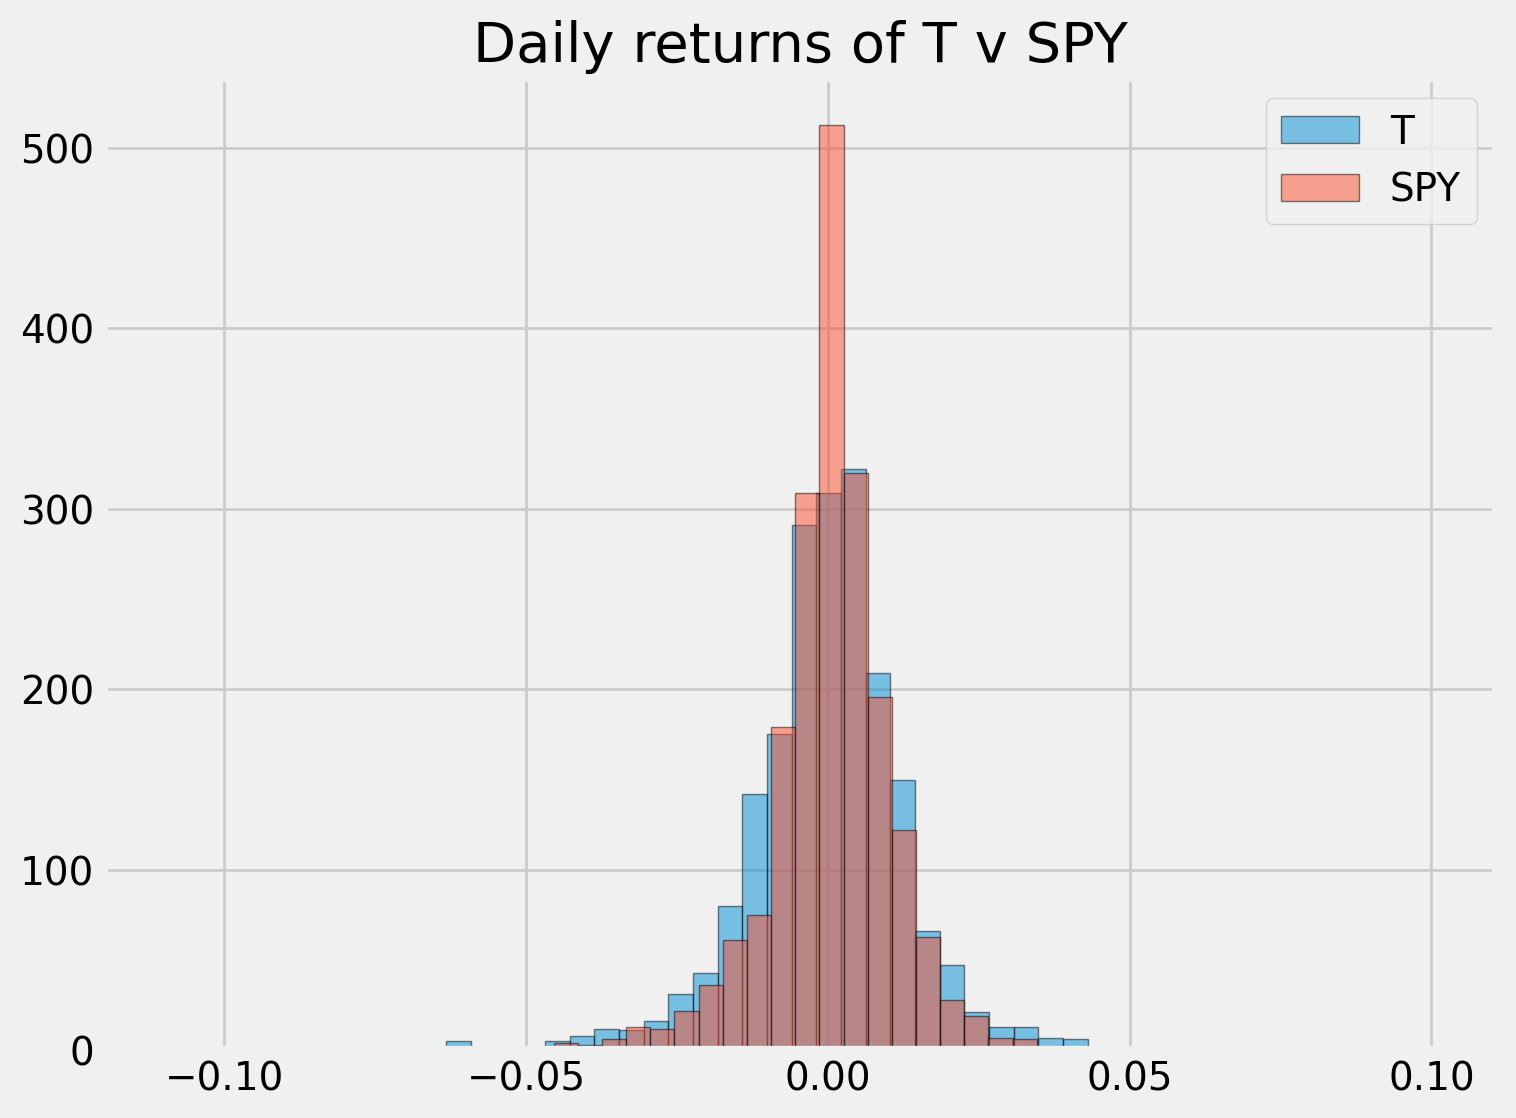

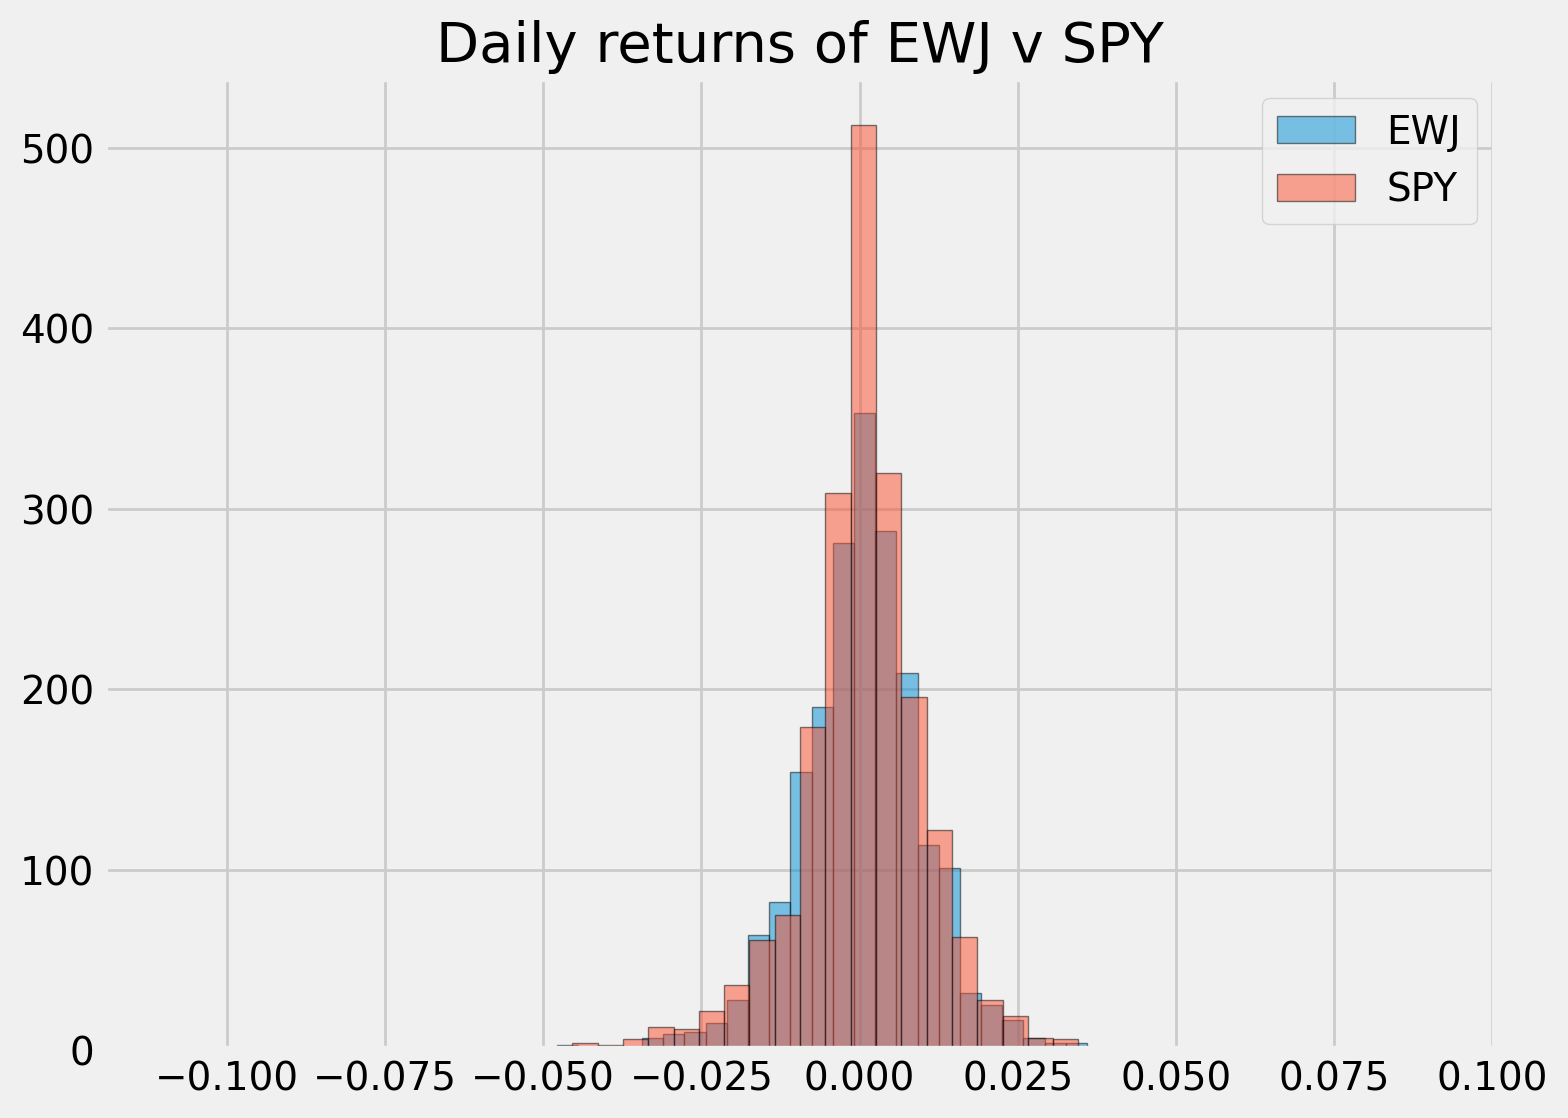

In [86]:
stocks = ['AAPL', 'TSLA', 'AMZN', 'GOOG', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 'T', 'SPY', 'EWJ']
for stock in stocks:
    title = f"Daily returns of {stock} v SPY"
    if stock != 'SPY':
        stock_histogram(returns, stock, title)
    else:
        continue

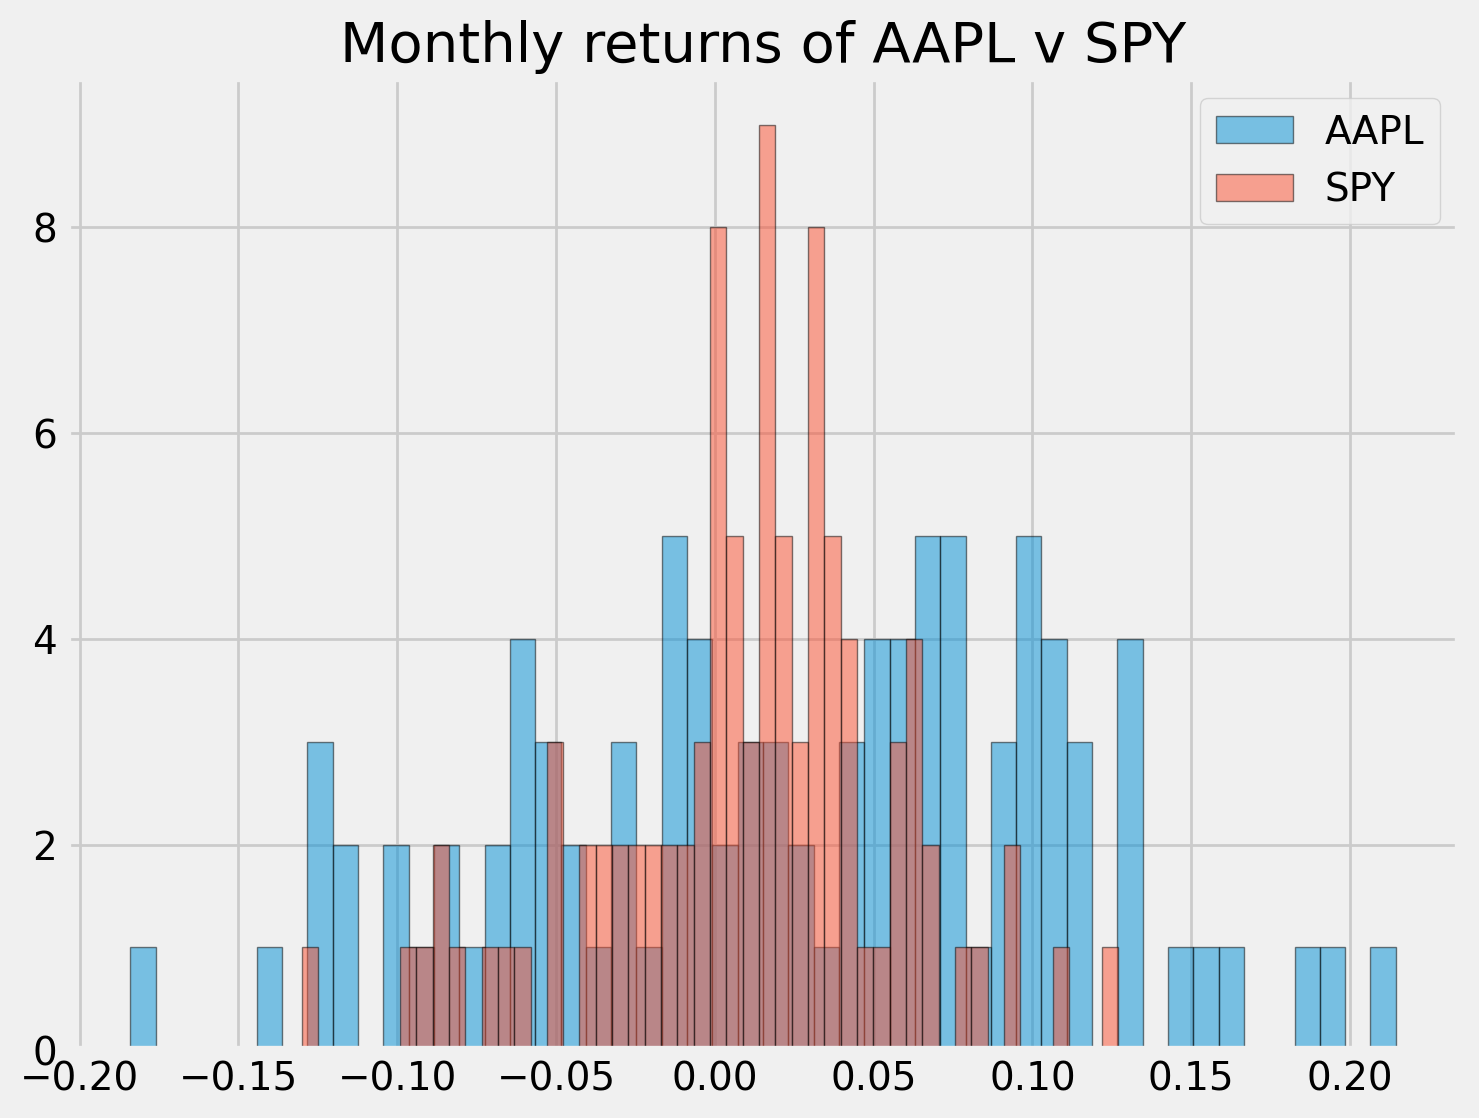

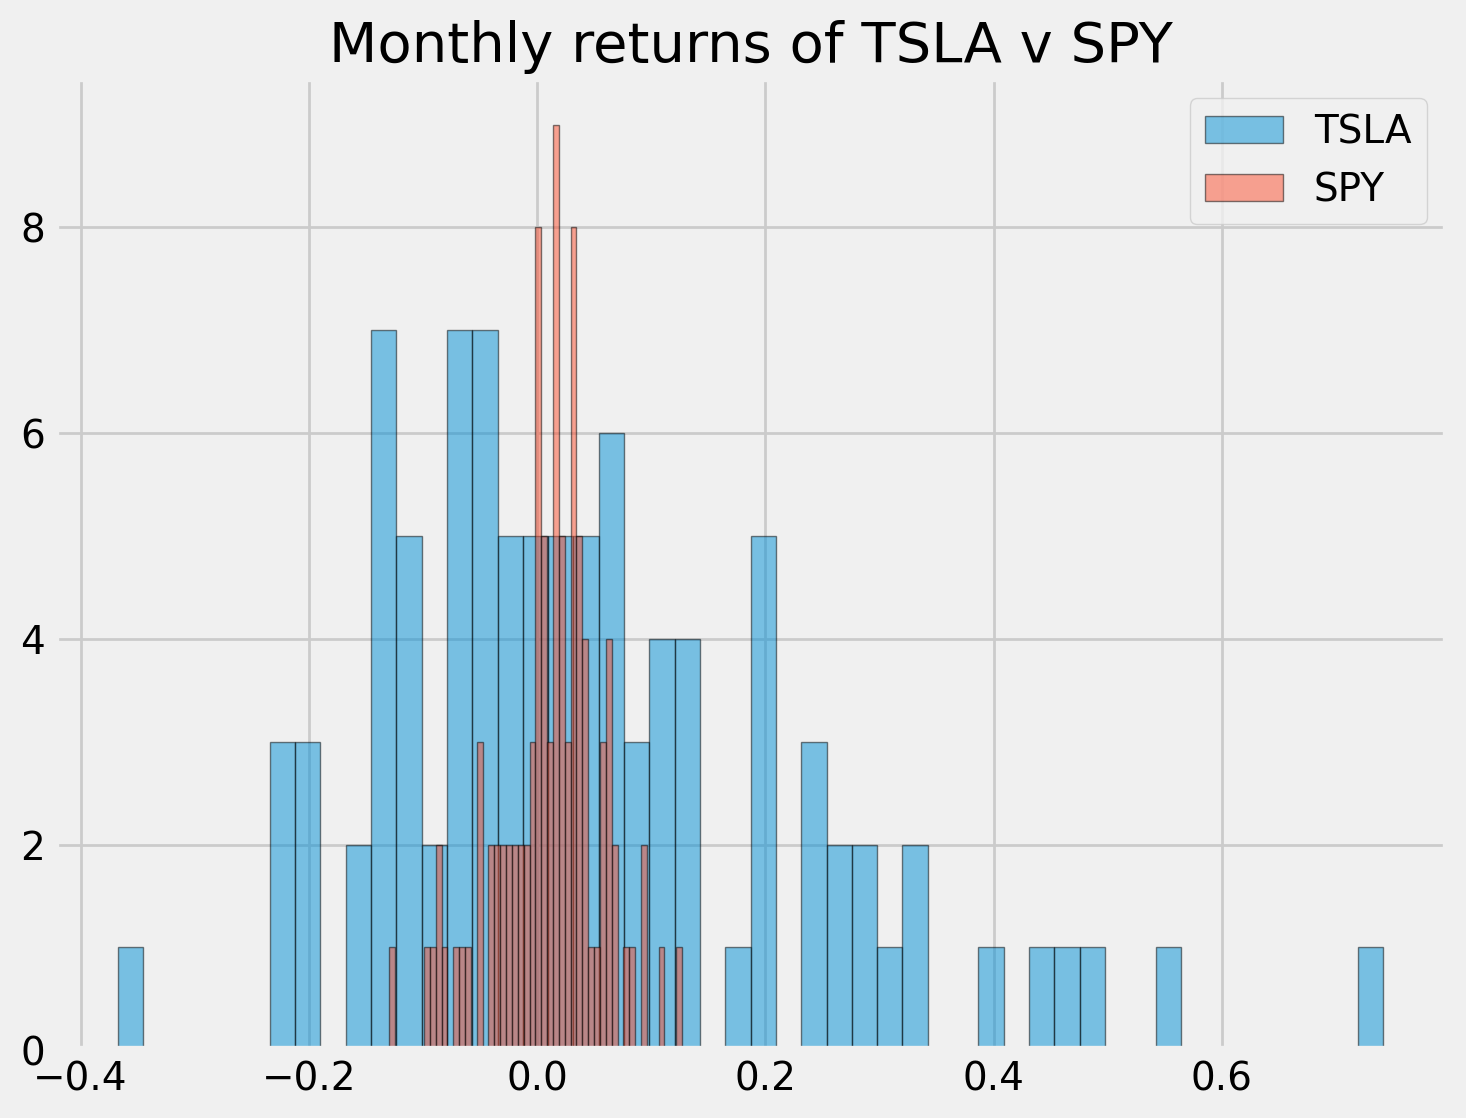

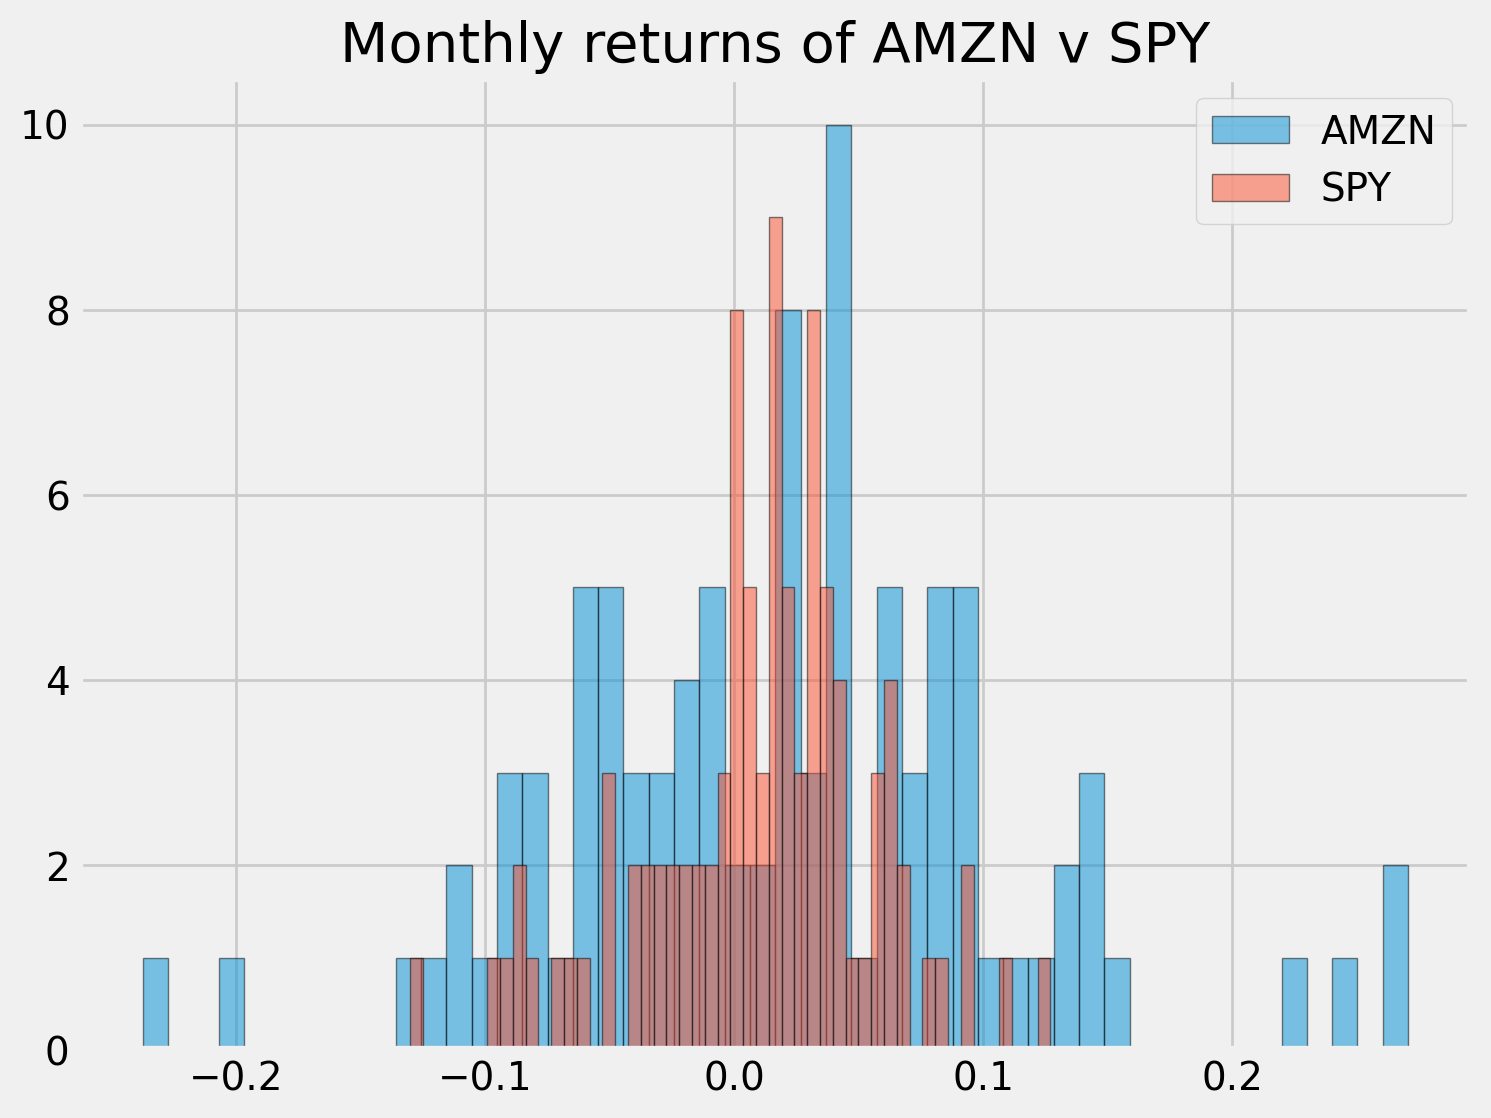

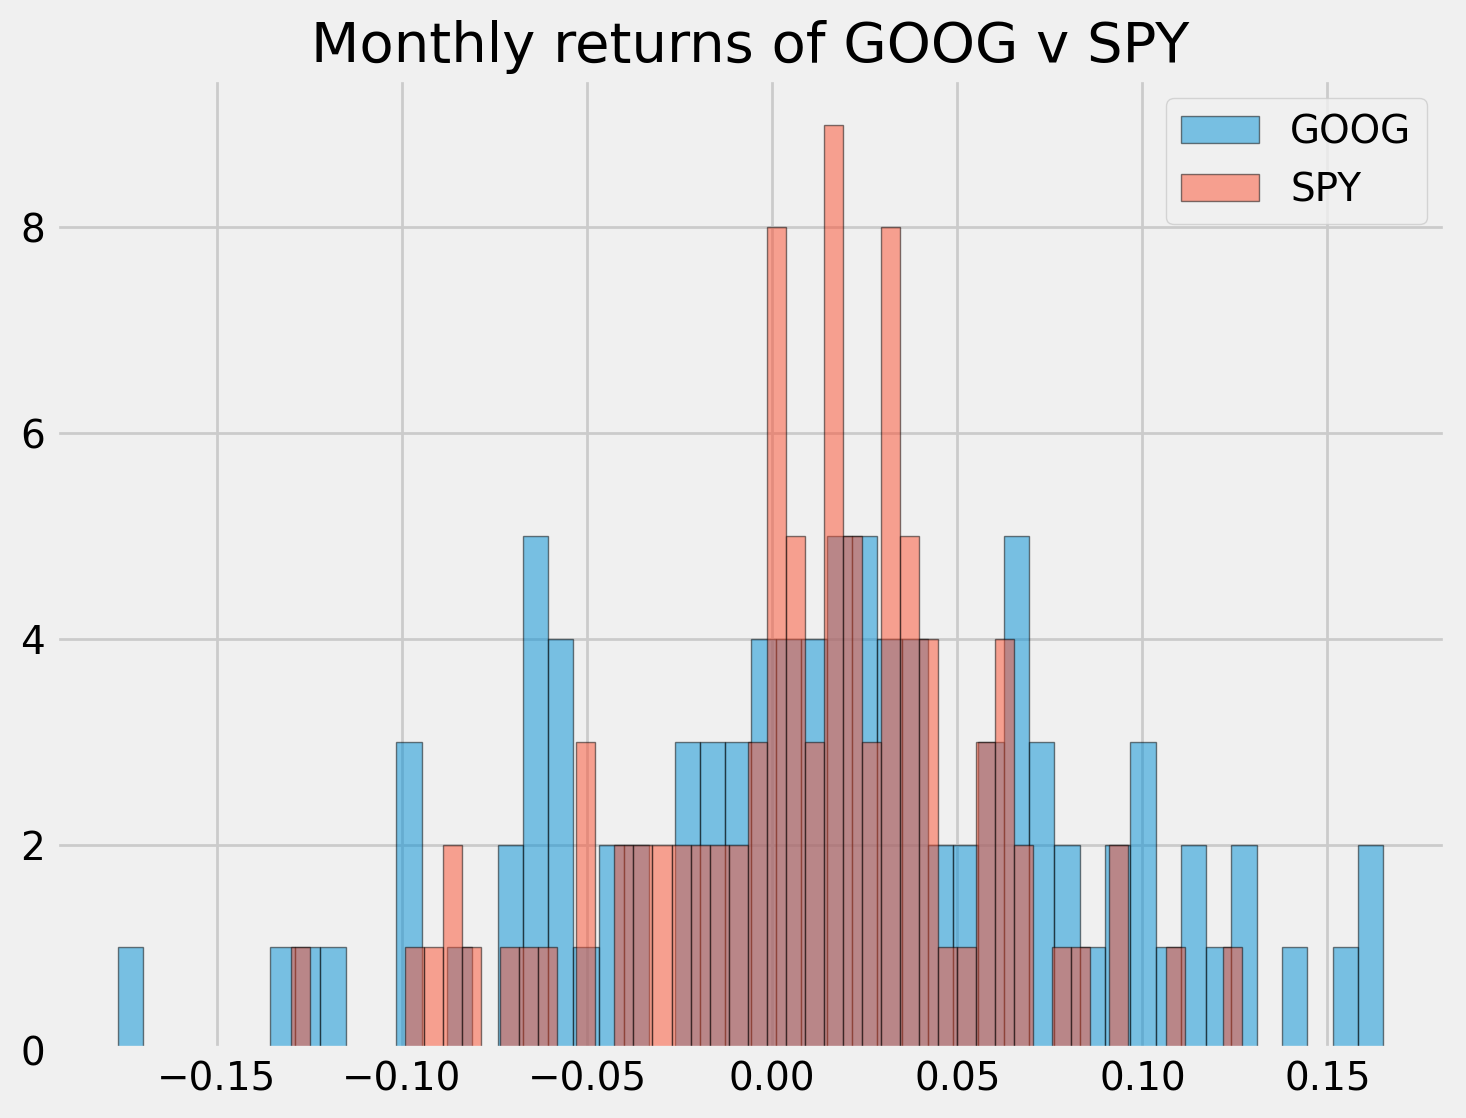

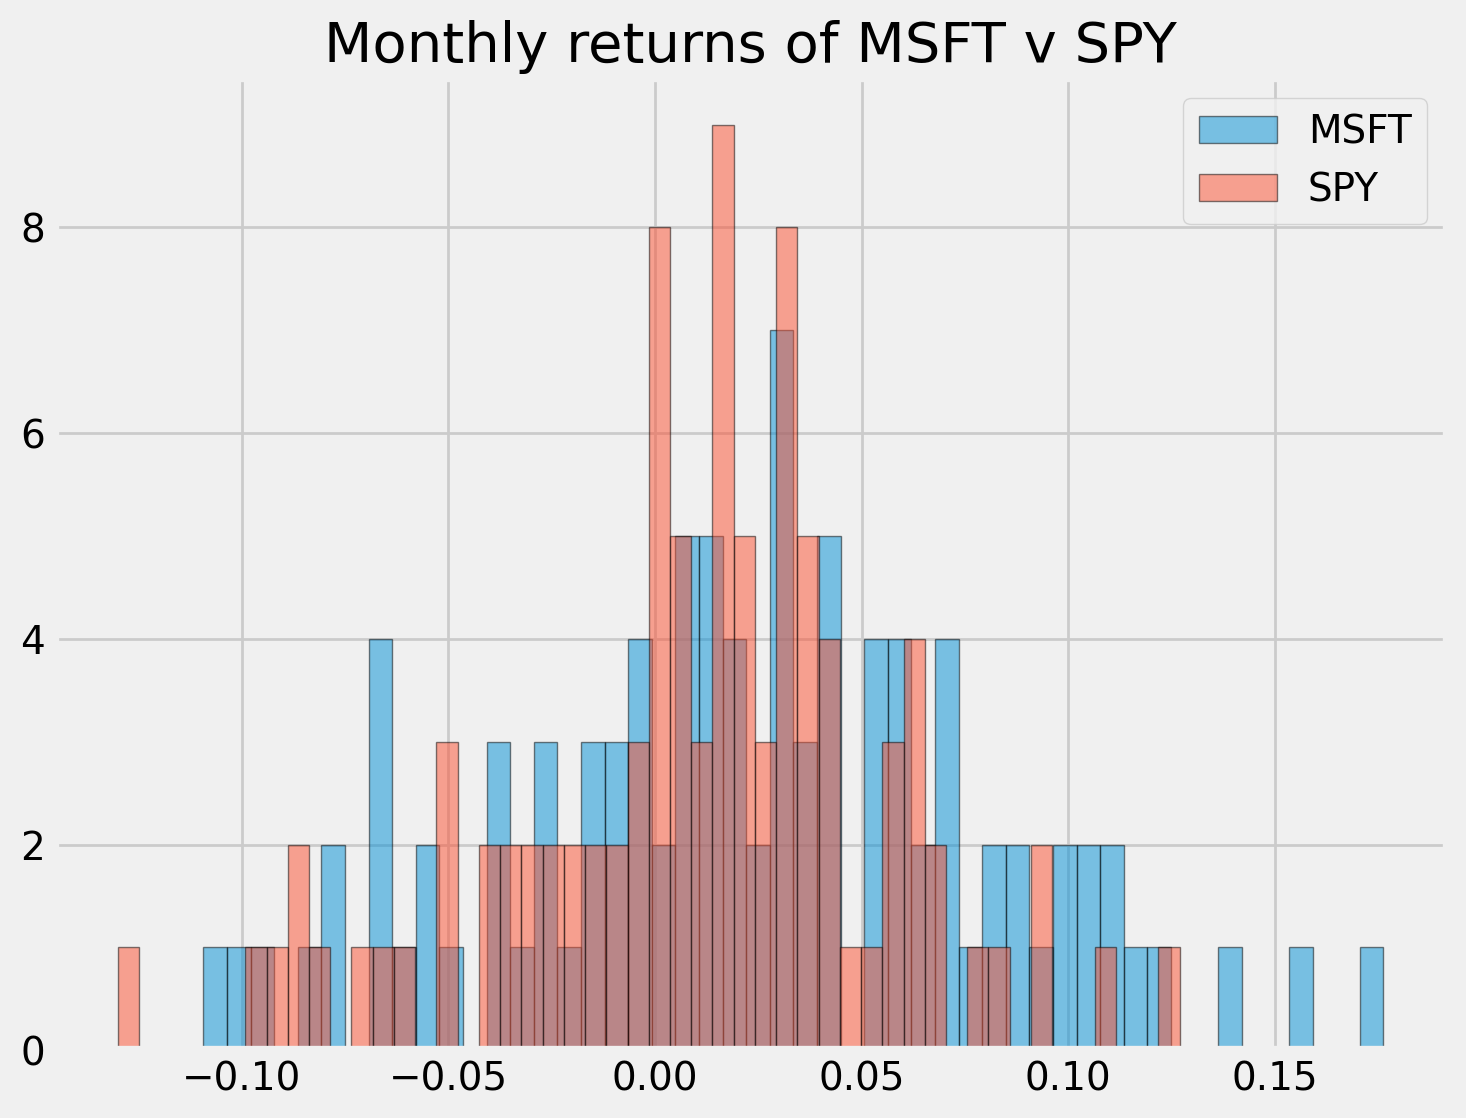

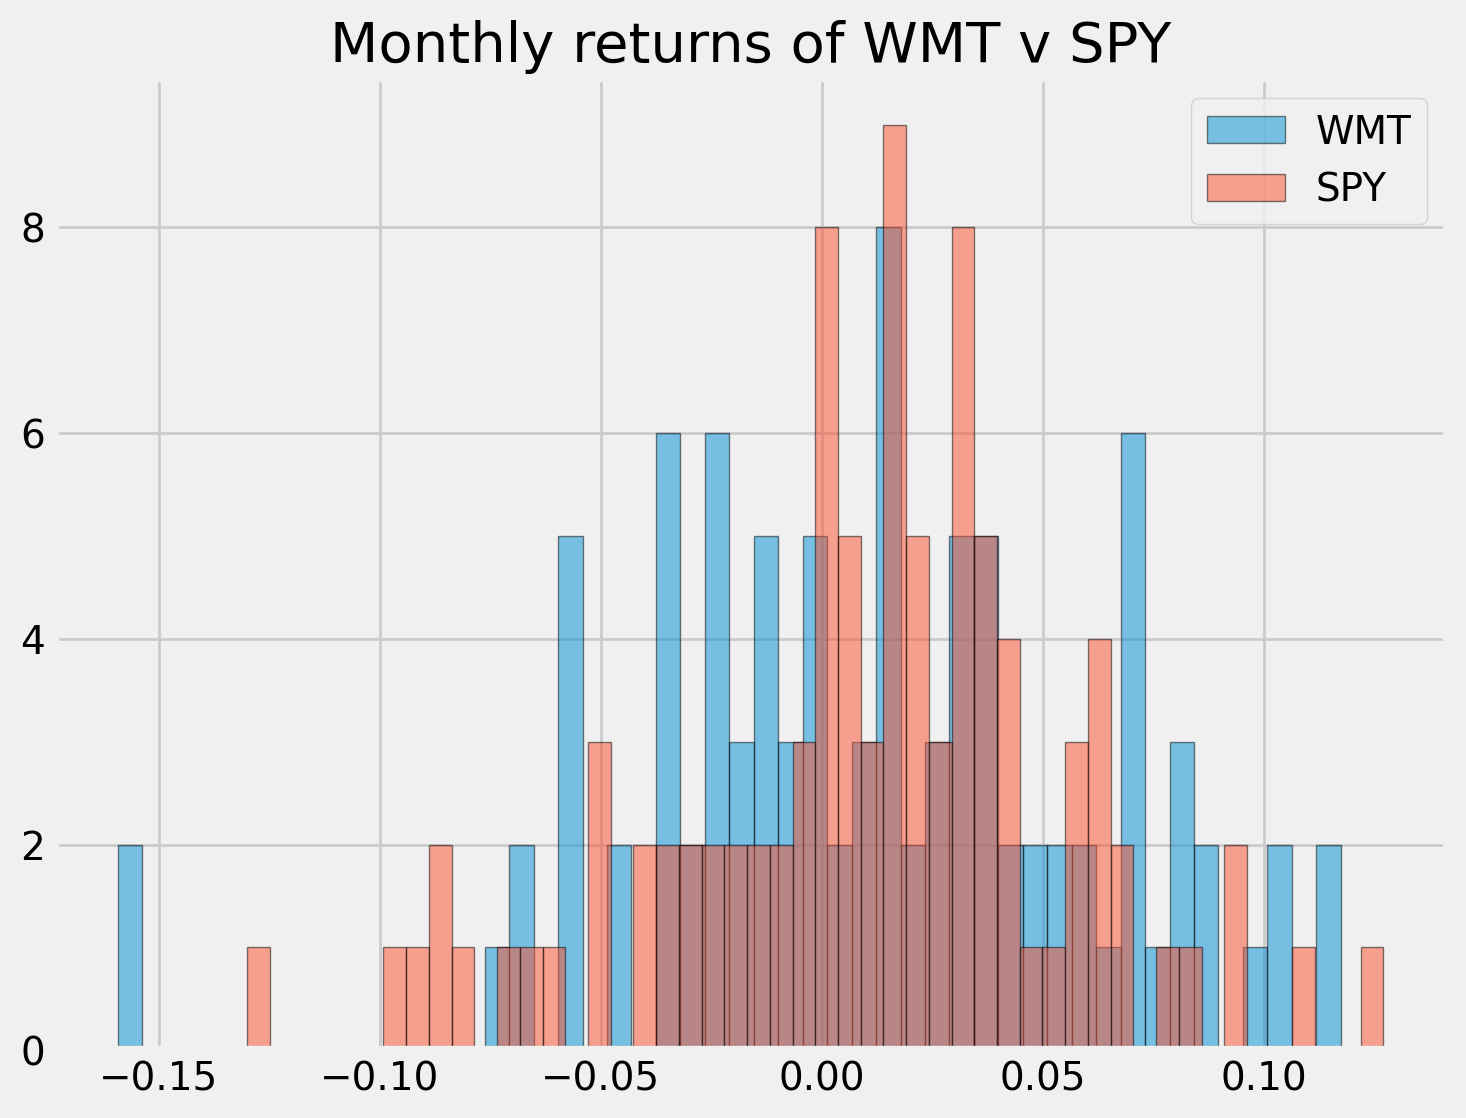

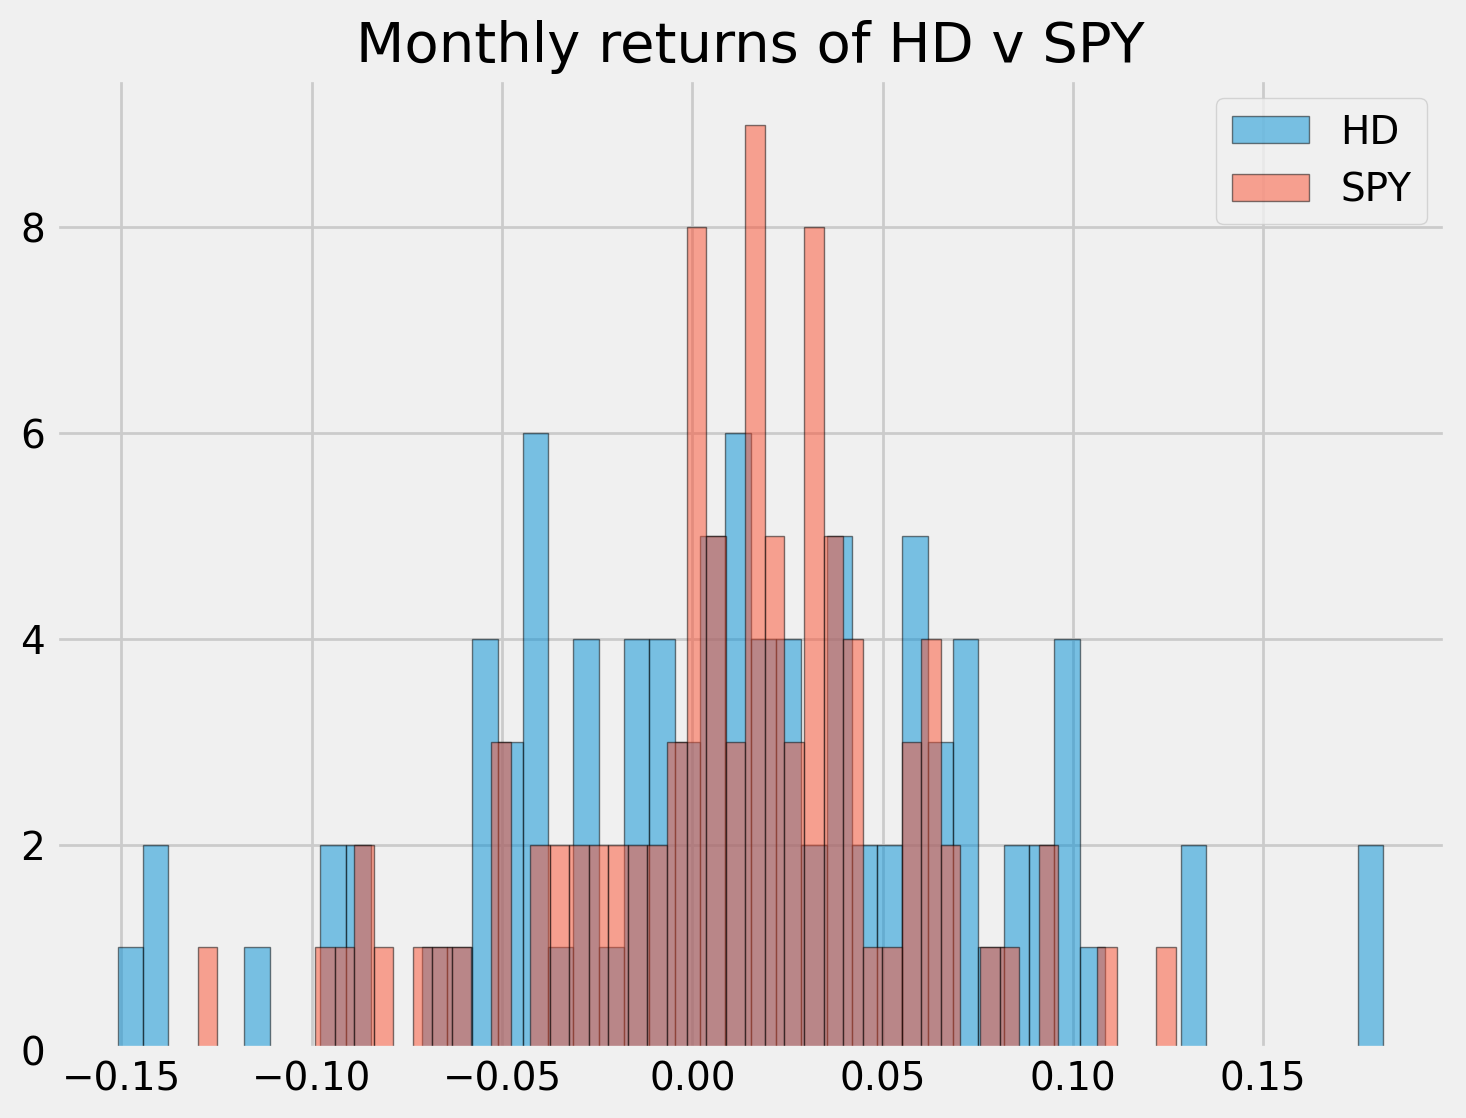

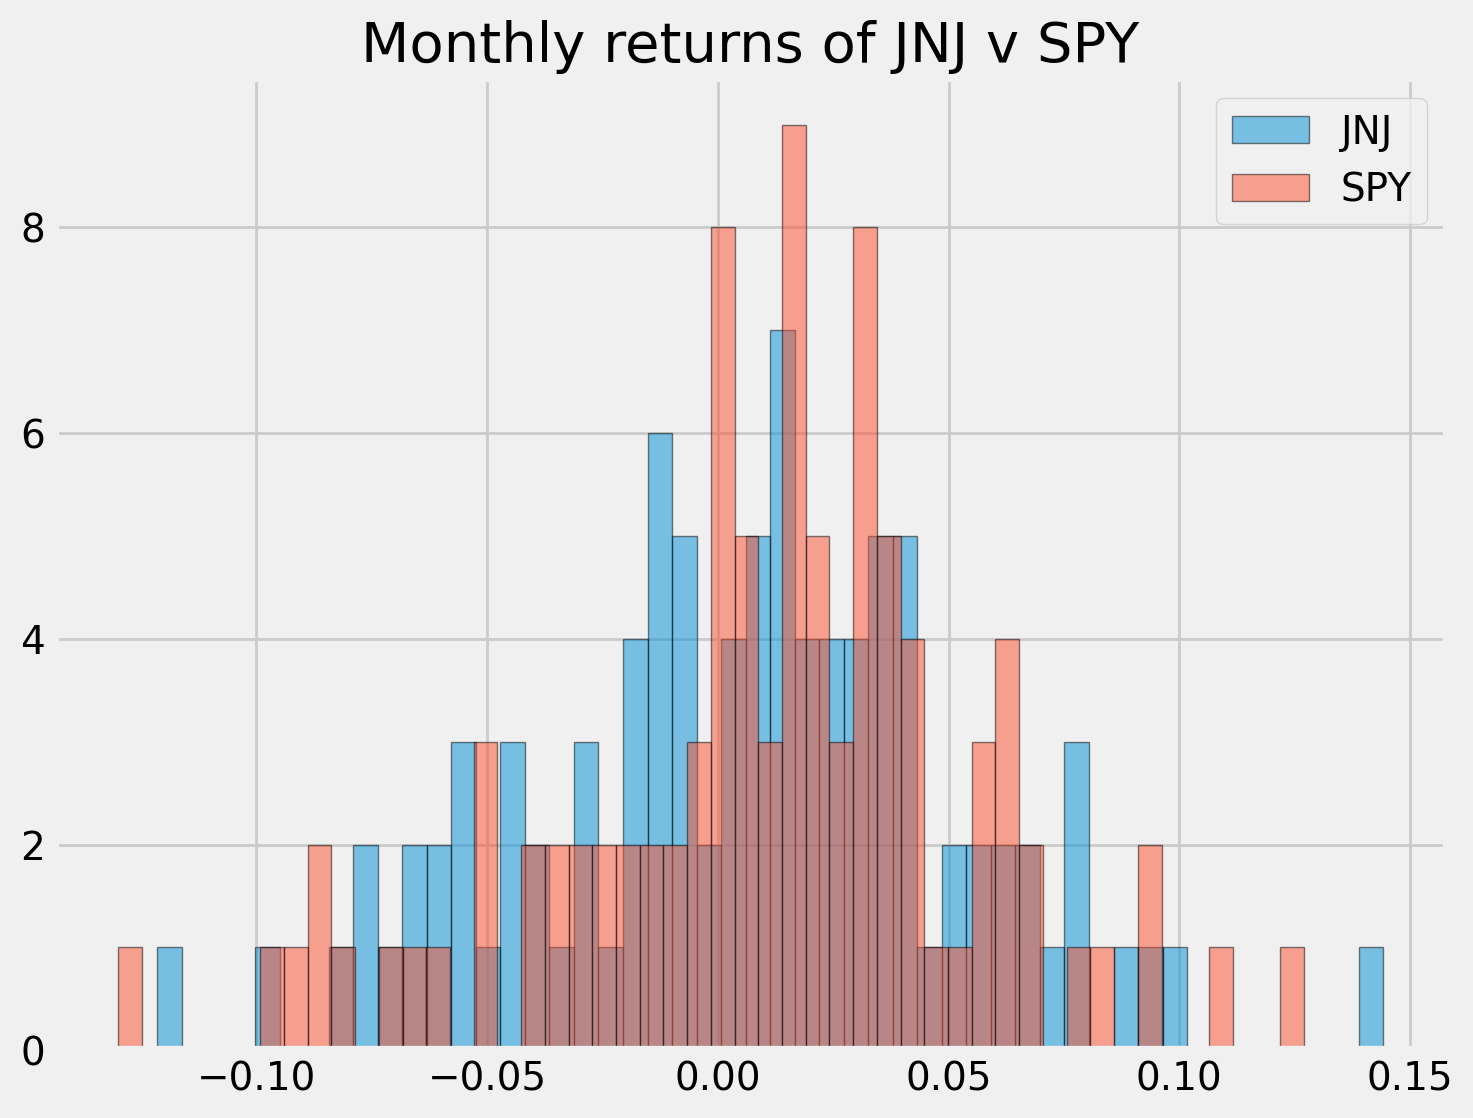

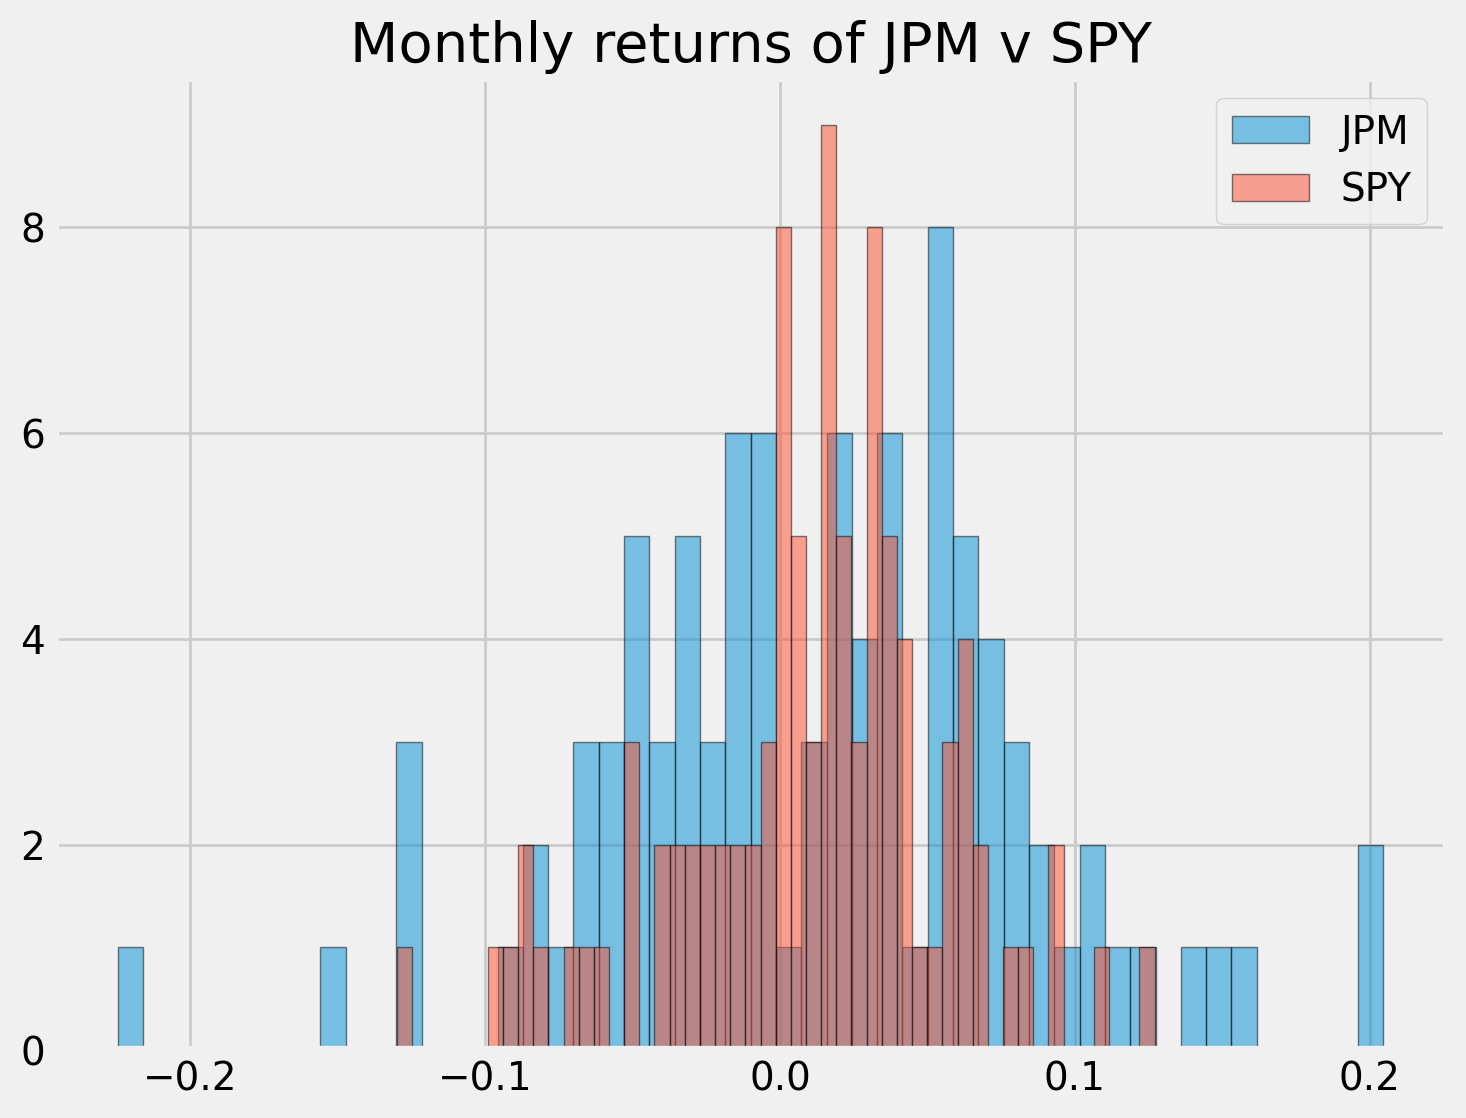

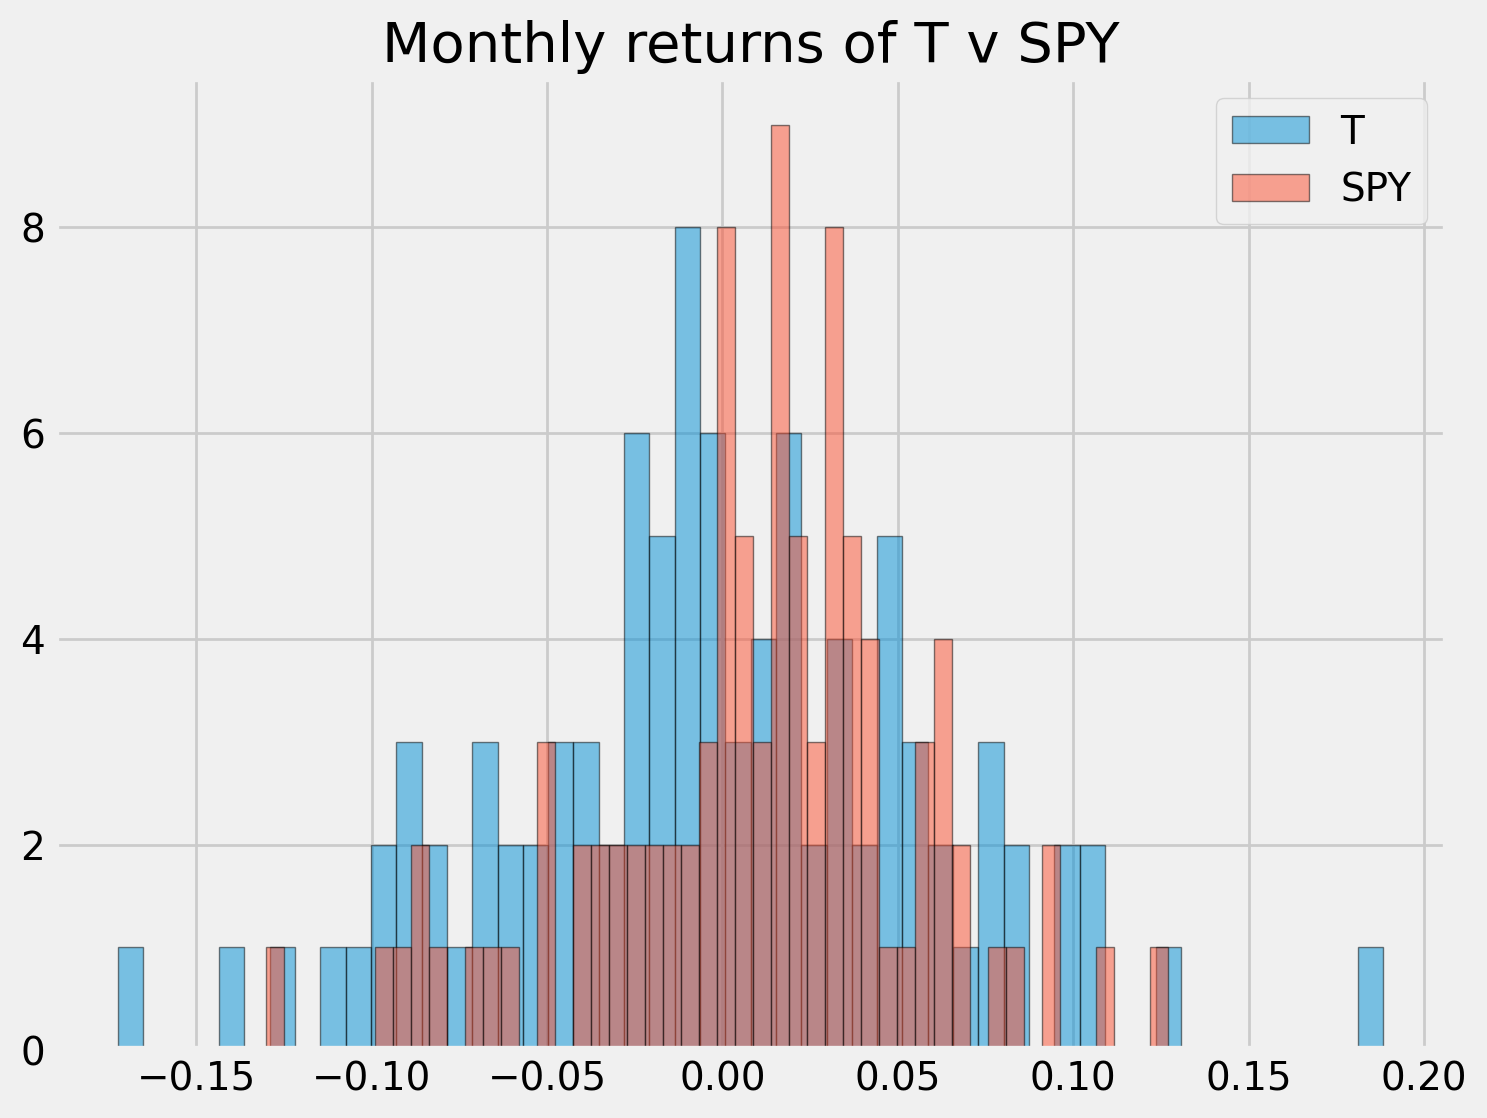

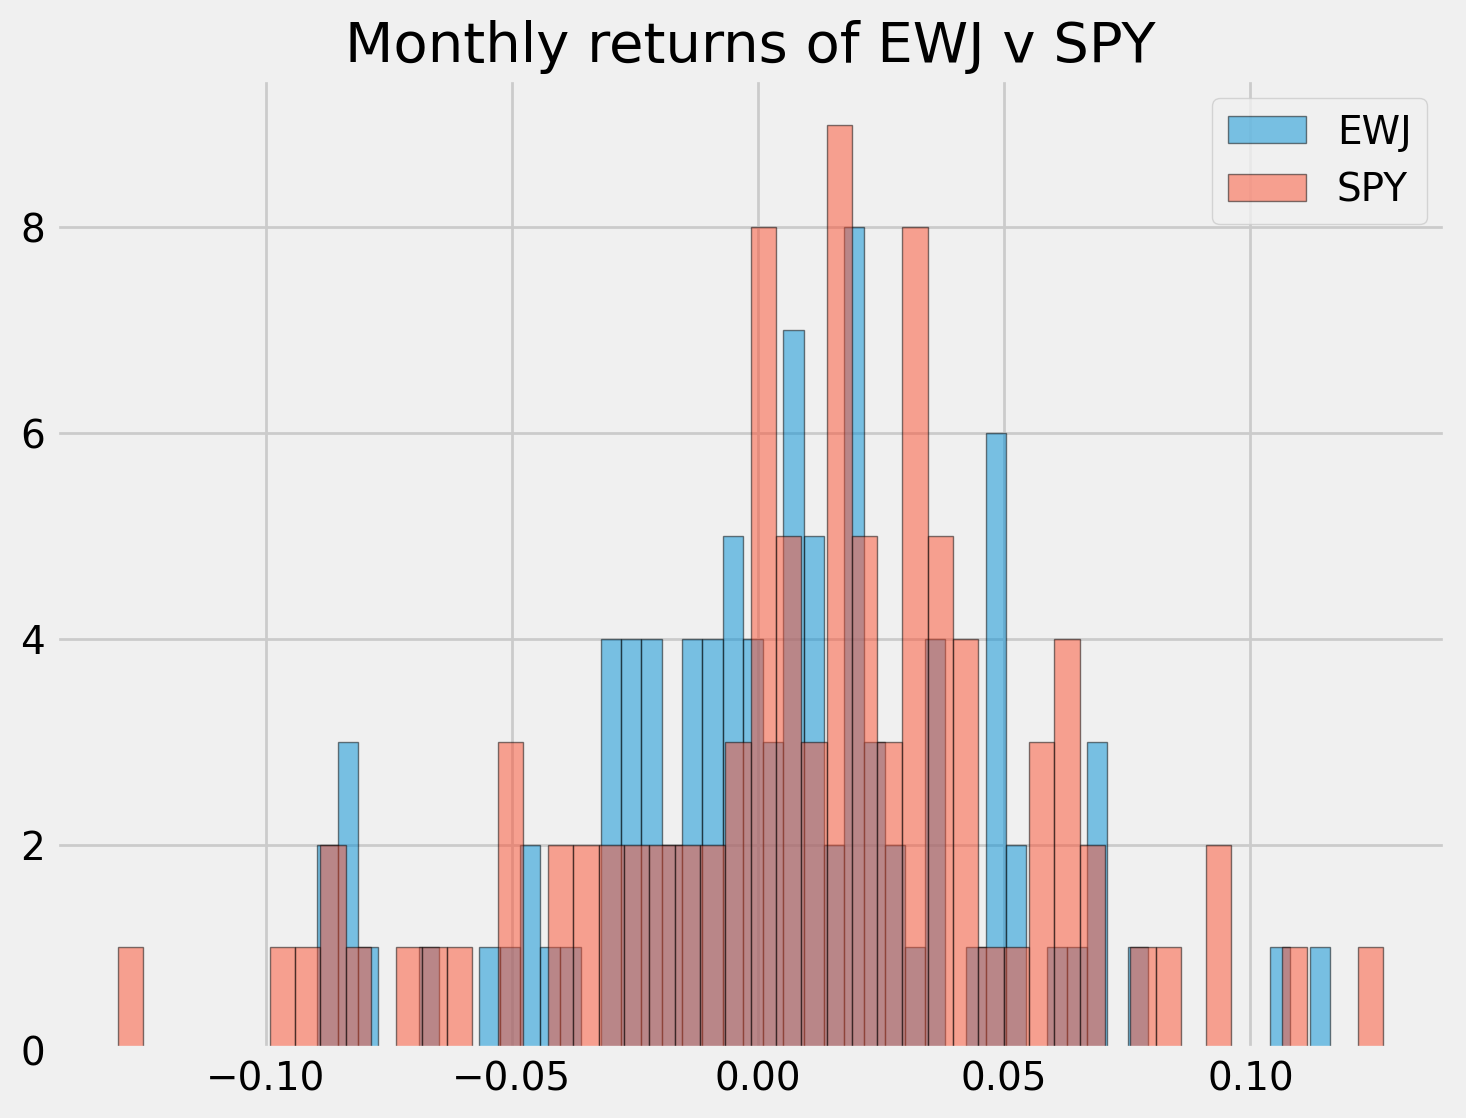

In [87]:
# Create graphs for monthly returns
for stock in stocks:
    title = f"Monthly returns of {stock} v SPY"
    if stock != 'SPY':
        stock_histogram(monthly_returns, stock, title)
    else:
        continue

### Calculate annualized stats.

In [88]:
for stock in stocks:
    mean = returns[stock].mean()
    annual_mean = (1 + mean)**252 - 1
    std_dev = returns[stock].std() * np.sqrt(252)
    print("---------------------------------------")
    print(f"\t{stock}\nMean: {annual_mean}\nStDv: {std_dev}")
    print("---------------------------------------")


---------------------------------------
	AAPL
Mean: 0.3394340998507035
StDv: 0.29330967234736355
---------------------------------------
---------------------------------------
	TSLA
Mean: 0.684416034306883
StDv: 0.5820732004229534
---------------------------------------
---------------------------------------
	AMZN
Mean: 0.2847541353191092
StDv: 0.3315069929104289
---------------------------------------
---------------------------------------
	GOOG
Mean: 0.23097755504379047
StDv: 0.2846952257452138
---------------------------------------
---------------------------------------
	MSFT
Mean: 0.3230444760283311
StDv: 0.2779885803854891
---------------------------------------
---------------------------------------
	WMT
Mean: 0.15171410242805528
StDv: 0.2157290208341175
---------------------------------------
---------------------------------------
	HD
Mean: 0.16676516193623447
StDv: 0.25304793947039567
---------------------------------------
---------------------------------------
	JNJ
Me

### Repreat the Mean /StDv Calculations using two other packages
Yfinance and Pandas-datareader

In [89]:
import yfinance as yf
yf.pdr_override()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

In [90]:
start = datetime(2022,1,1)
end = datetime(2023,12,31)

aapl = web.get_data_yahoo('AAPL', start=start, end=end)

print(type(aapl))
aapl.info()
aapl

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.4 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225067,86709100
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


In [91]:
# Get data for all stocks using pandas data reader
start = datetime(2014,1,1)
end = datetime(2023,12,31)

for ticker in stocks:
    # Get returns of stocks
    stock_data = web.get_data_yahoo(str(ticker), start=start, end=end)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()

    # Calculate annualzied mean and std
    mean_stock = stock_data['Returns'].mean()
    annual_mean_stock = (1 + mean_stock)**252 -1
    std_dev_stock = stock_data['Returns'].std() * np.sqrt(252)

    # Print results
    print("---------------------------------------")
    print(f"\t{ticker}\nMean: {annual_mean_stock}\nStDv: {std_dev_stock}")
    print("---------------------------------------")

[*********************100%%**********************]  1 of 1 completed
---------------------------------------
	AAPL
Mean: 0.3251998316780862
StDv: 0.28380522563118227
---------------------------------------
[*********************100%%**********************]  1 of 1 completed
---------------------------------------
	TSLA
Mean: 0.6096841091220577
StDv: 0.5566101755543822
---------------------------------------
[*********************100%%**********************]  1 of 1 completed
---------------------------------------
	AMZN
Mean: 0.2949744203105513
StDv: 0.33171987111189244
---------------------------------------
[*********************100%%**********************]  1 of 1 completed
---------------------------------------
	GOOG
Mean: 0.2236223612265349
StDv: 0.27941470292688925
---------------------------------------
[*********************100%%**********************]  1 of 1 completed
---------------------------------------
	MSFT
Mean: 0.33067134989935276
StDv: 0.2706931020951794
-----------

In [92]:
# Get data for all stocks using yfinance
stocks = ['AAPL', 'TSLA', 'AMZN', 'GOOG', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 'T', 'SPY', 'EWJ']

start = datetime(2014,1,1)
end = datetime(2023,12,31)

yf_returns_dict = {}

for ticker_yf in stocks:
    # Get returns of stocks
    stock_data_yf = yf.download(str(ticker_yf), start=start, end=end, progress=False)
    yf_returns_dict[(ticker_yf + ' Returns')] = stock_data_yf['Adj Close'].pct_change()

yf_combined_returns = pd.DataFrame.from_dict(yf_returns_dict)
yf_combined_returns = yf_combined_returns.dropna(how='all')

print("---------------------------------------")
for ticker_yf in stocks:
    mean_stock = yf_combined_returns[(ticker_yf + ' Returns')].mean()
    annual_mean_stock = (1 + mean_stock) ** 252 - 1
    std_dev_stock = yf_combined_returns[(ticker_yf + ' Returns')].std() * np.sqrt(252)
    print(f"{(ticker_yf + ' Returns')}\nMean: {annual_mean_stock}\nStDv: {std_dev_stock}")
    print("---------------------------------------")

---------------------------------------
AAPL Returns
Mean: 0.32519980693997996
StDv: 0.2838051536546619
---------------------------------------
TSLA Returns
Mean: 0.6096841091220577
StDv: 0.5566101755543822
---------------------------------------
AMZN Returns
Mean: 0.2949744203105513
StDv: 0.33171987111189244
---------------------------------------
GOOG Returns
Mean: 0.2236223612265349
StDv: 0.27941470292688925
---------------------------------------
MSFT Returns
Mean: 0.33067129186713906
StDv: 0.2706930036223405
---------------------------------------
WMT Returns
Mean: 0.11881088184509747
StDv: 0.20784640523445835
---------------------------------------
HD Returns
Mean: 0.21744560643134614
StDv: 0.24070071541524515
---------------------------------------
JNJ Returns
Mean: 0.10290467186631824
StDv: 0.18004810052389036
---------------------------------------
JPM Returns
Mean: 0.1864143810239689
StDv: 0.26937828563749344
---------------------------------------
T Returns
Mean: 0.056203673

### Calculate and show differences in CSRP and Yfinance
(Only those two, since yfinance and pandas_datareader are the same)

In [93]:
for stock in stocks:
    mean_crsp = returns[stock].mean()
    annual_mean_crsp = (1 + mean_crsp)**252 -1
    std_dev_crsp = returns[stock].std() * np.sqrt(252)

    mean_yf = yf_combined_returns[(stock + ' Returns')].mean()
    annual_mean_yf = (1 + mean_yf)**252 -1
    std_dev_yf = yf_combined_returns[(stock + ' Returns')].std() * np.sqrt(252)

    diff_mean_crsp_yf = annual_mean_crsp - annual_mean_yf
    diff_std_crsp_yf = std_dev_crsp - std_dev_yf

    print("---------------------------------------")
    print(f"Mean and Std Difference for {stock} between CRSP & Yfinance:")
    print(f"CRSP - Yf Mean: {diff_mean_crsp_yf}")
    print(f"CRSP - Yf Std: {diff_std_crsp_yf}")
    print("---------------------------------------")

---------------------------------------
Mean and Std Difference for AAPL between CRSP & Yfinance:
CRSP - Yf Mean: 0.014234292910723534
CRSP - Yf Std: 0.009504518692701636
---------------------------------------
---------------------------------------
Mean and Std Difference for TSLA between CRSP & Yfinance:
CRSP - Yf Mean: 0.0747319251848253
CRSP - Yf Std: 0.025463024868571216
---------------------------------------
---------------------------------------
Mean and Std Difference for AMZN between CRSP & Yfinance:
CRSP - Yf Mean: -0.010220284991442119
CRSP - Yf Std: -0.00021287820146353997
---------------------------------------
---------------------------------------
Mean and Std Difference for GOOG between CRSP & Yfinance:
CRSP - Yf Mean: 0.007355193817255579
CRSP - Yf Std: 0.005280522818324529
---------------------------------------
---------------------------------------
Mean and Std Difference for MSFT between CRSP & Yfinance:
CRSP - Yf Mean: -0.0076268158388079765
CRSP - Yf Std: 0.